In [1]:
#Supress warning messages
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import numpy and pandas packages
import numpy as np
import pandas as pd

#import matplotlib.pyplot and seaborn libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#Set Display options
pd.set_option('display.max_columns',500)

In [4]:
#Read CarPrice_Assignment.csv dataset

missing_values = ["n/a", "na", "--","NA","NaN"]

car_price_df = pd.read_csv('CarPrice_Assignment.csv', encoding='iso-8859-1', na_values=missing_values)

#Data Analysis - Print shape, information about the dataset
print('Shape pf input dataset is:\n',car_price_df.shape,'\n\n')
print('information about dataset:\n')
print(car_price_df.info())


Shape pf input dataset is:
 (205, 26) 


information about dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 

In [5]:
#Checking datatypes of all variables
car_price_df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [6]:
#Print sample records from dataset
print(car_price_df.head())

   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  carlength  carwidth  \
0  convertible        rwd          front       88.6      168.8      64.1   
1  convertible        rwd          front       88.6      168.8      64.1   
2    hatchback        rwd          front       94.5      171.2      65.5   
3        sedan        fwd          front       99.8      176.6      66.2   
4        sedan        4wd          front       99.4      176.6      66.4   

   carheight  curbweight enginetype cylindernumber  engi

Insights - From the sample data, I see that doornumber and cylindernumber can be converted to numeric datatype which will also help in our model building stage.

But before converting them, lets first check for missing values in the dataset.

In [23]:
#Checking missing values in dataset

In [7]:
#Creating a function - Missing data Check, to check missing value count and their percenatge
def missing_values(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (100*(df.isnull().sum()/df.count())).sort_values(ascending=False)
    return pd.concat([total,percent], axis=1, keys=['Total','Percent'])

In [8]:
missing_values(car_price_df)

,Total,Percent
price,0,0.0
highwaympg,0,0.0
symboling,0,0.0
CarName,0,0.0
fueltype,0,0.0
aspiration,0,0.0
doornumber,0,0.0
carbody,0,0.0
drivewheel,0,0.0
enginelocation,0,0.0


Clearly, we don't have any misisng values in our dataset.

In [9]:
#Lets now check for any duplicate records in pur dataset
car_price_df[car_price_df.duplicated()]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


Clearly, we don't have any dupliacte record in our dataset.

# Data Preparation

In [10]:
#Lets now check unique values for doornumber and cynlindernumber in our dataset.
print('Unique values of DoorNumber present in dataset: ',car_price_df['doornumber'].unique())
print('Unique values of CylinderNumber present in dataset: ',car_price_df['cylindernumber'].unique())

Unique values of DoorNumber present in dataset:  ['two' 'four']
Unique values of CylinderNumber present in dataset:  ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']


In [11]:
#Convert above alphabetic value to numeric values.

car_price_df['doornumber'] = car_price_df['doornumber'].map({'two':2,'four':4})
car_price_df['cylindernumber'] = car_price_df['cylindernumber'].map({'four':4, 'six':6,'five':5,'three':3,'twelve':12,'two':2,'eight':8})
car_price_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [12]:
#Extracting Company Name from CarName column
car_df = car_price_df.copy()  #Create a backup of original dataset
Cname= car_df['CarName'].apply(lambda x: x.split(' ')[0])
car_df.insert(2,'CompanyName',Cname)
car_df.drop('CarName', axis=1, inplace=True)
car_df.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# Data Cleaning

In [13]:
#lets check for unique car names available in dataset
car_df['CompanyName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

After analysis, I came to know that there are some spelling mistakes in dataset. 
Example - maxda and mazda, vokswagen, vw and volkswagen, porcshce and porsche, Nissan and nissan, toyouta and toyota
lets convert all these values first

In [14]:
car_df['CompanyName']=car_df['CompanyName'].apply(lambda x: list(pd.Series(x).map({'maxda': 'mazda', 'vokswagen': 'volkswagen', 'vw': 'volkswagen', 'porcshce':'porsche', 'Nissan':'nissan', 'toyouta':'toyota'}))[0] if x in ['maxda', 'vw','vokswagen','porcshce','Nissan', 'toyouta'] else x)


In [15]:
#Check for unique car names available in dataset
print(car_df['CompanyName'].unique())
#Calculating frequencies of car sold for each car company
car_df['CompanyName'].value_counts()

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']


toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
subaru         12
volkswagen     12
volvo          11
peugeot        11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
chevrolet       3
alfa-romero     3
jaguar          3
renault         2
mercury         1
Name: CompanyName, dtype: int64

#Insights:
I see that toyota has sold the most cars follwoed by nissan and mazda.

And, Mercury has sold the least cars followed by renault, chevrolet and alfa-romero.

In [16]:
#Lets check datatypes of all variables in our dataset
car_df.dtypes

car_ID                int64
symboling             int64
CompanyName          object
fueltype             object
aspiration           object
doornumber            int64
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber        int64
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [17]:
#After we have converted company names, there can be a chance of having duplicate records. Lets check that.
car_df[car_df.duplicated()]


,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


There is no duplicate records found in the dataset.

In [18]:
#After doing a little research on google, I came to know that its not city mpg and highway mpg which matters 
#while we buy a car. Infact, it is fual economy.
#which is caluculate as - 0.55 * citympg + 0.45 * highwaympg

#lets calculate fuel economy

car_df['fuel_economy'] = (0.55 * car_df['citympg']) + (0.45 * car_df['highwaympg'])
car_df.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fuel_economy
0,1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,23.70
1,2,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,23.70
2,3,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,22.15
3,4,2,audi,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,26.70
4,5,2,audi,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,19.80


In [19]:
#lets drop citympg and highwaympg now
car_df.drop(['citympg', 'highwaympg'], axis=1, inplace=True)
car_df.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,price,fuel_economy
0,1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,13495.0,23.70
1,2,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,16500.0,23.70
2,3,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,16500.0,22.15
3,4,2,audi,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500,13950.0,26.70
4,5,2,audi,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500,17450.0,19.80


In [20]:
#Lets also drop CarID as it is nothing but just a serial number or an index for our records.
car_df.drop('car_ID', axis=1,inplace=True)
car_df.head()


,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,price,fuel_economy
0,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,13495.0,23.70
1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,16500.0,23.70
2,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,16500.0,22.15
3,2,audi,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500,13950.0,26.70
4,2,audi,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500,17450.0,19.80


In [21]:
car_df_cleaned = car_df.copy() #Creating backup of car_df dataset.

In [95]:
#After checking data dictionary, I found that symboling is also a categorical variable. I will first see its impact on price
#and based on that will create a new categorical variable out of this field.

# Data Visualization

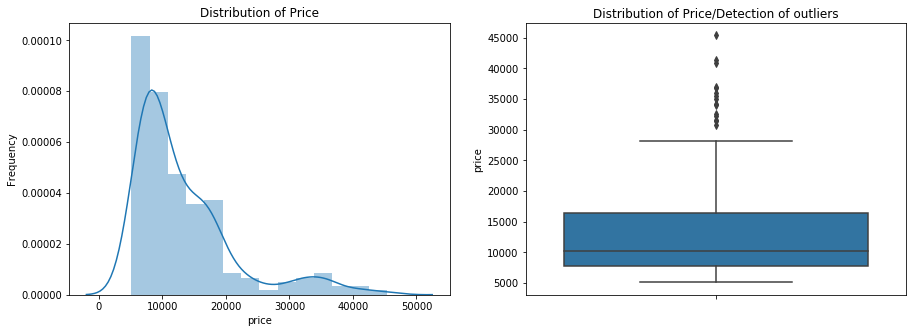

In [22]:
#Lets see variance of Price column and check if there are outliers in our dataset.
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title('Distribution of Price')
plt.ylabel('Frequency')
sns.distplot(car_df['price'])

plt.subplot(122)
sns.boxplot(y=car_df['price'])
plt.title('Distribution of Price/Detection of outliers')
plt.show()


Insights - 
From the left plot, I see that Price data is almost normally distributed and also it is heavily skewed.

From the right hand side plot, I found that there are outliers in the dataset.

In [23]:
#Lets now describe the dataset to check skewness
car_df['price'].describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

Clearly, most high price exist in last quarter which explains the skew and outliers in the dataset.

In [24]:
#Lets check price distribution based on quantiles
print(car_df['price'].quantile([0,0.25,0.50,0.75,0.90,0.95,0.96, 0.98,1]))

0.00     5118.00
0.25     7788.00
0.50    10295.00
0.75    16503.00
0.90    22563.00
0.95    32472.40
0.96    34159.04
0.98    36809.60
1.00    45400.00
Name: price, dtype: float64


In [25]:
#There is a huge gap of Price in last top 2% of data points.
#Drop top 2% of datapoints to reduce this skewness and remove outliers as ouliers may impact my final prediction.

threshold_price = car_df['price'].quantile([0.98]).values[0]
row_index_to_rm_price = car_df[car_df['price'] > threshold_price].index

car_df_without_price_outliers = car_df.drop(row_index_to_rm_price)

car_df_without_price_outliers.head()

,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,price,fuel_economy
0,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,13495.0,23.70
1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,16500.0,23.70
2,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,16500.0,22.15
3,2,audi,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500,13950.0,26.70
4,2,audi,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500,17450.0,19.80


In [26]:
car_df_without_price_outliers.shape

(200, 24)

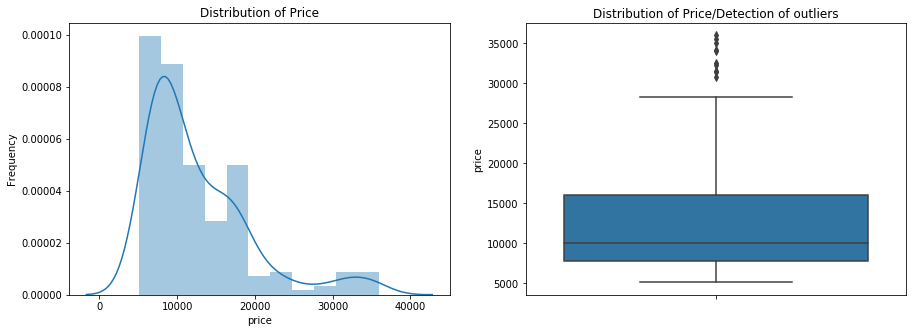

In [27]:
#Lets again see variance of Price column and check if there are outliers in our dataset.
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title('Distribution of Price')
plt.ylabel('Frequency')
sns.distplot(car_df_without_price_outliers['price'])

plt.subplot(122)
sns.boxplot(y=car_df_without_price_outliers['price'])
plt.title('Distribution of Price/Detection of outliers')
plt.show()


In [64]:
#Insights-
#We still have outliers in our dataset but dataset is not highly skewed now.

In [28]:
#Lets find out all Categorical columns

car_df_without_price_outliers.select_dtypes(exclude=['int32','int64','float64', 'float32']).columns.values

array(['CompanyName', 'fueltype', 'aspiration', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'fuelsystem'], dtype=object)

In [29]:
#Lets now check Average money made by each company by selling their cars
car_df_without_price_outliers.groupby('CompanyName')['price'].mean()

CompanyName
alfa-romero    15498.333333
audi           17859.166714
bmw            21792.500000
buick          30469.333333
chevrolet       6007.000000
dodge           7875.444444
honda           8184.692308
isuzu           8916.500000
jaguar         34600.000000
mazda          10652.882353
mercury        16503.000000
mitsubishi      9239.769231
nissan         10415.666667
peugeot        15489.090909
plymouth        7963.428571
porsche        29993.625000
renault         9595.000000
saab           15223.333333
subaru          8541.250000
toyota          9885.812500
volkswagen     10077.500000
volvo          18063.181818
Name: price, dtype: float64

In [ ]:
#Insights - I found that most money is made by Jaguar, buick, prosche followed by BMW.

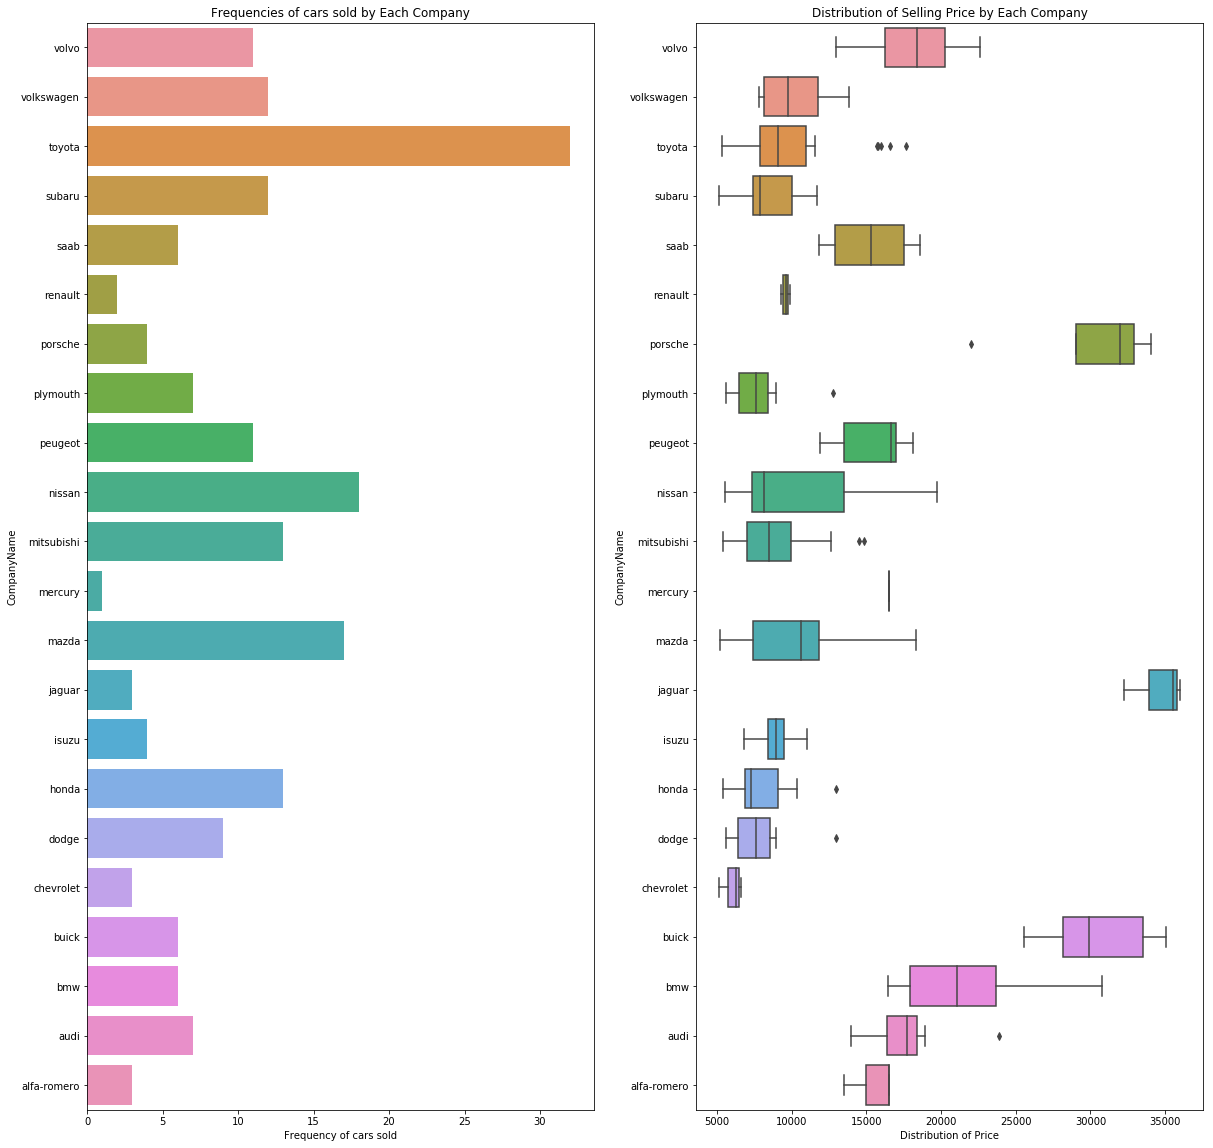

In [30]:
#Visualizing Frequencies of cars sold by each company and Money earned by each company by selling their cars
plt.figure(figsize=(20,20))
plt.subplot(121)
plt.title('Frequencies of cars sold by Each Company')
sns.countplot(y='CompanyName', data = car_df_without_price_outliers.sort_values(by='CompanyName', ascending=False))
plt.xlabel('Frequency of cars sold')
plt.subplot(122)
sns.boxplot(y='CompanyName', x='price', data=car_df_without_price_outliers.sort_values(by='CompanyName', ascending=False))
plt.title('Distribution of Selling Price by Each Company')
plt.xlabel('Distribution of Price')

plt.show()

In [34]:
#Clearly, Toyota cars are in high demand but sellers are not able to make much money out of it.
#Also, there is more profit to sellers of Jaguar, Porsche, buick followed by BMW cars

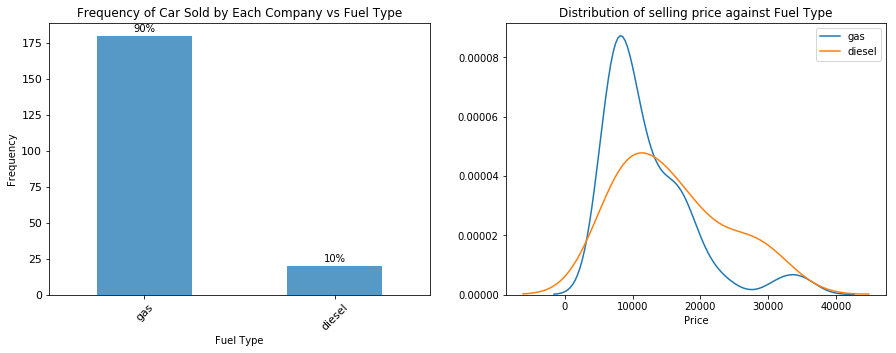

In [31]:
#Frequency of Car Sold vs their fuel type and Distribution of Selling Price against fuel type

plt.figure(figsize=(15,5))
plt.subplot(121)
#sns.countplot(x='fueltype', data=car_df_without_price_outliers)
ax = car_df_without_price_outliers['fueltype'].value_counts().plot(kind="bar",rot=45,alpha=0.75,fontsize = 11)
for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:.0%}'.format(height/len(car_df_without_price_outliers)),
            ha="center") 
plt.title('Frequency of Car Sold by Each Company vs Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Frequency')
plt.subplot(122)
sns.kdeplot(car_df_without_price_outliers.loc[car_df['fueltype']=='gas']['price'], label='gas')
sns.kdeplot(car_df_without_price_outliers.loc[car_df['fueltype']=='diesel']['price'], label='diesel')
plt.title('Distribution of selling price against Fuel Type')
plt.xlabel('Price')
plt.show()

In [ ]:
#Insights - Gas cars are more in demand but diesel cars make more money.

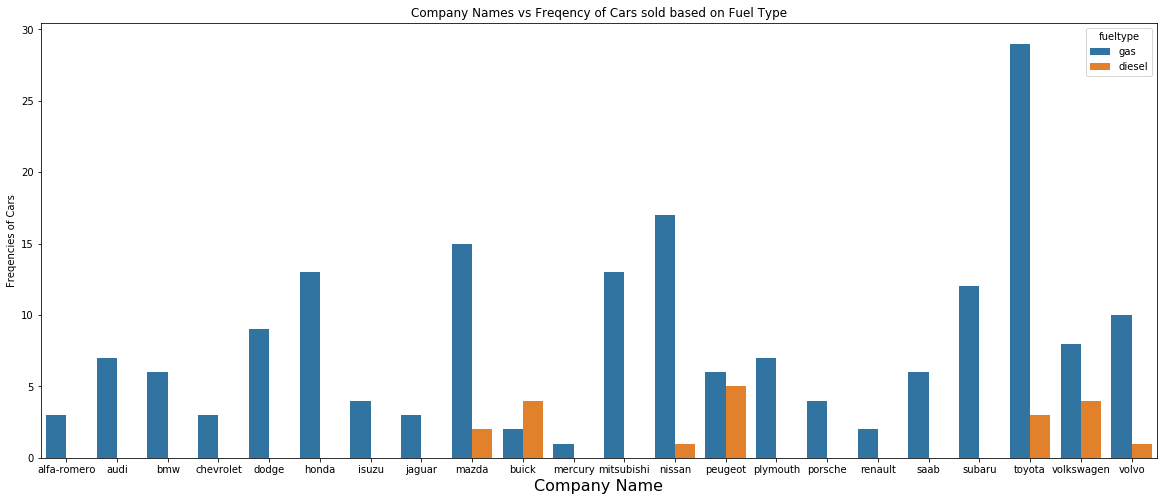

In [32]:
#Lets now see on what level Fuel Type can help to check reason of making more money by Jaguar, Porsche and BMW
plt.figure(figsize=(20,8))
sns.countplot(x='CompanyName', hue='fueltype', data = car_df_without_price_outliers)
plt.title('Company Names vs Freqency of Cars sold based on Fuel Type')
plt.xlabel('Company Name', fontsize=16)
plt.ylabel('Freqencies of Cars')
plt.show()

#Insights - 
From the previous graphs of frequencies of cars sold by each company and Company Names vs Cars sold based on fuel type, I analyzed below points:

1. Toyota sells the most gas cars as gas cars are in highest demand(90% by our dataset), Toyota sells the most cars.
2. Even though Jaguar, Porsche and BMW sells only gas cars and that too much less than in number than Toyota, they make the most profit. That means there must be some other driving factors for this.

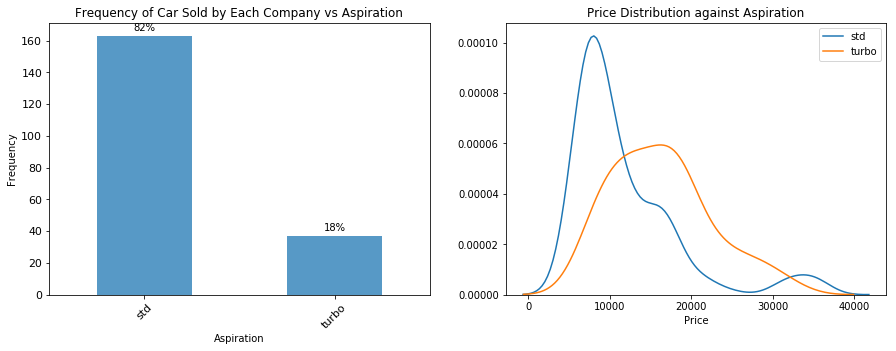

In [33]:
#Visualize Cars sold against aspiration and their price distributon
#Aspiration basically relates to how the engine’s internal combustion works

plt.figure(figsize=(15,5))
plt.subplot(121)
ax = car_df_without_price_outliers['aspiration'].value_counts().plot(kind="bar",rot=45,alpha=0.75,fontsize = 11)
for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:.0%}'.format(height/len(car_df_without_price_outliers)),
            ha="center") 
plt.title('Frequency of Car Sold by Each Company vs Aspiration')
plt.xlabel('Aspiration')
plt.ylabel('Frequency')
plt.subplot(122)
sns.kdeplot(car_df_without_price_outliers.loc[car_df['aspiration']=='std']['price'], label='std')
sns.kdeplot(car_df_without_price_outliers.loc[car_df['aspiration']=='turbo']['price'], label='turbo')
plt.title('Price Distribution against Aspiration')
plt.xlabel('Price')
plt.show()

Insights -
I see that Cars with std Aspiration are in more demand rather than turbo cars.
But Turbo cars companies make much more money.

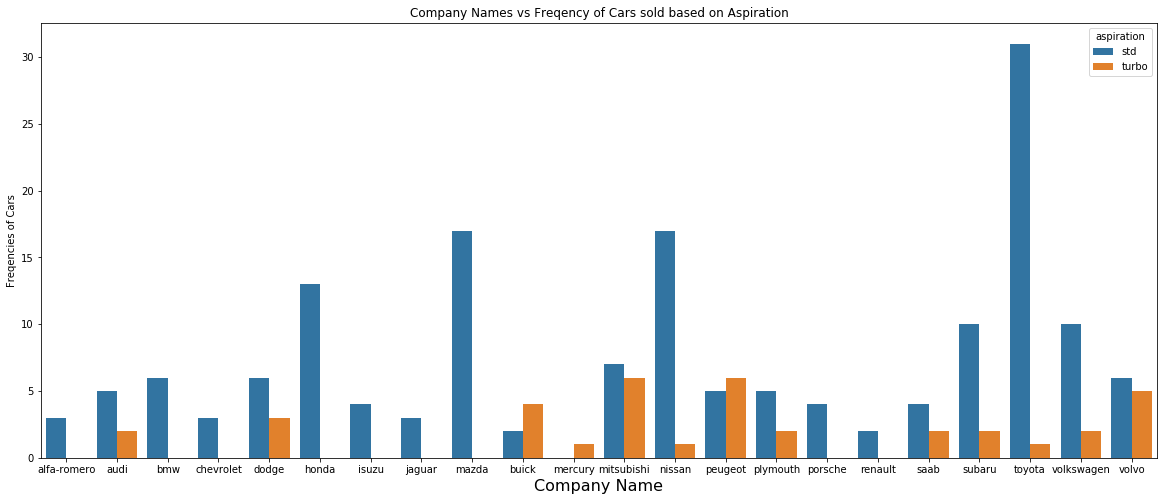

In [34]:
#Lets now see on what level Aspiration can help to check reason of making more money by Jaguar, Porsche and BMW
plt.figure(figsize=(20,8))
sns.countplot(x='CompanyName', hue='aspiration', data = car_df_without_price_outliers)
plt.title('Company Names vs Freqency of Cars sold based on Aspiration')
plt.xlabel('Company Name', fontsize=16)
plt.ylabel('Freqencies of Cars')
plt.show()

Insight - I found that Jaguar, Porsche and BMW sells only cars with std aspiration. That means this is also not the reason of 
their highest selling price.

In [35]:
car_df.groupby('carbody')['price'].mean()

carbody
convertible    21890.500000
hardtop        22208.500000
hatchback      10376.652386
sedan          14344.270833
wagon          12371.960000
Name: price, dtype: float64

In [ ]:
#Insights - Clearly, hatchback cars are sold at a much lower price than hardtop and convertible

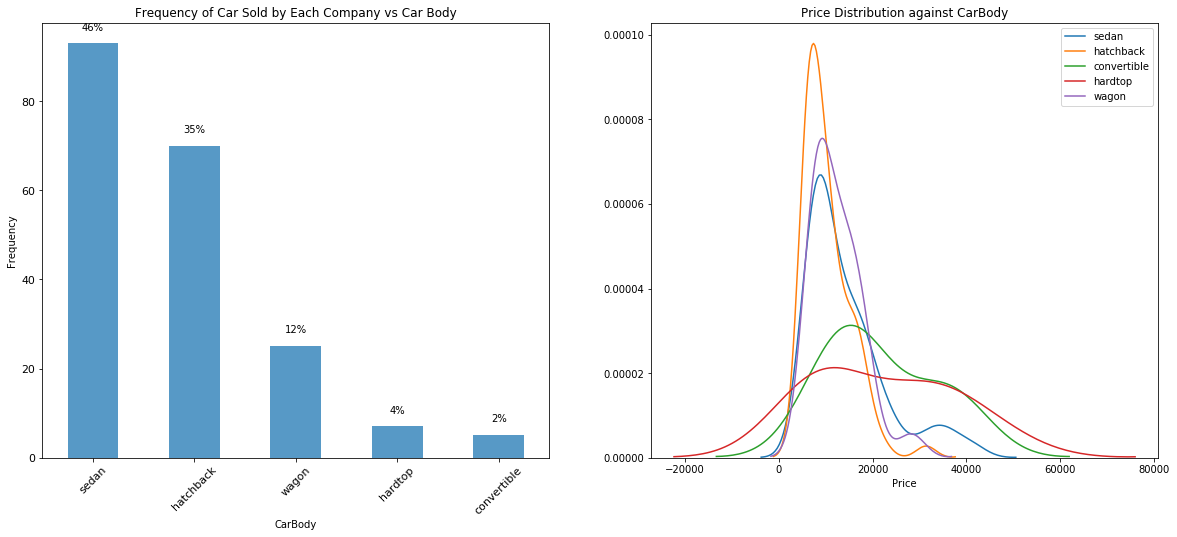

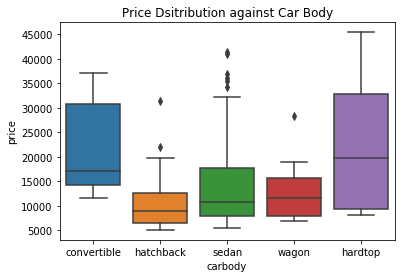

In [36]:
#Visualize Cars sold against carbody and their price distributon

plt.figure(figsize=(20,8))
plt.subplot(121)
ax = car_df_without_price_outliers['carbody'].value_counts().plot(kind="bar",rot=45,alpha=0.75,fontsize = 11)
for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:.0%}'.format(height/len(car_df_without_price_outliers)),
            ha="center") 
plt.title('Frequency of Car Sold by Each Company vs Car Body')
plt.xlabel('CarBody')
plt.ylabel('Frequency')
plt.subplot(122)
sns.kdeplot(car_df.loc[car_df['carbody']=='sedan']['price'], label='sedan')
sns.kdeplot(car_df.loc[car_df['carbody']=='hatchback']['price'], label='hatchback')
sns.kdeplot(car_df.loc[car_df['carbody']=='convertible']['price'], label='convertible')
sns.kdeplot(car_df.loc[car_df['carbody']=='hardtop']['price'], label='hardtop')
sns.kdeplot(car_df.loc[car_df['carbody']=='wagon']['price'], label='wagon')
plt.title('Price Distribution against CarBody')
plt.xlabel('Price')
plt.show()

plt.title('Price Dsitribution against Car Body')
sns.boxplot(y='price', x='carbody', data=car_df)
plt.show()

Insights - I found that mostly cars with carbody - sedan are most popular nowadays and are sold the most follwoed by hatchback. But cars with hardtop and convertible carbody are more expensive.

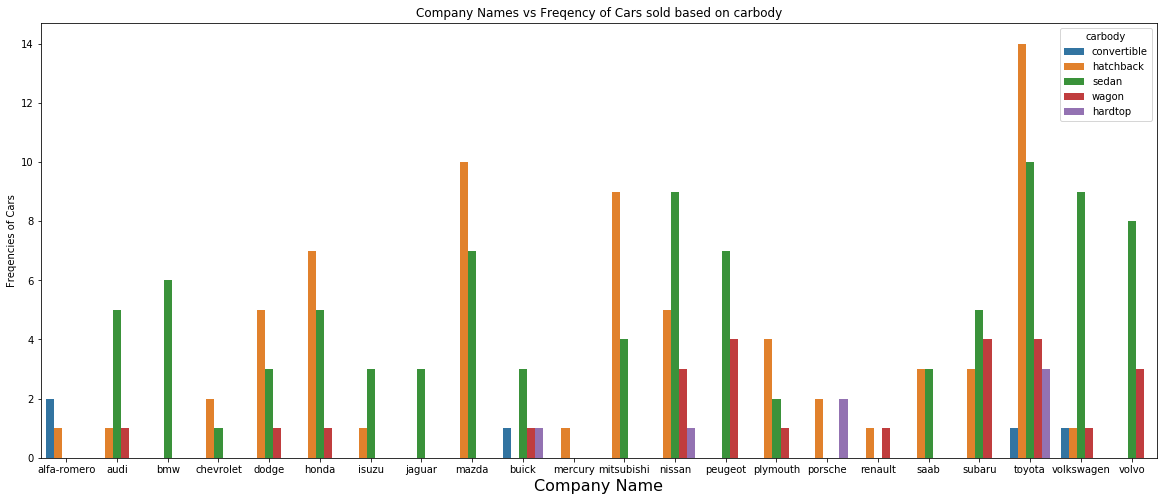

In [37]:
#Lets now see if car body plays any role behind more sales of jaguar, porsche and bmw
plt.figure(figsize=(20,8))
sns.countplot(x='CompanyName', hue='carbody', data = car_df_without_price_outliers)
plt.title('Company Names vs Freqency of Cars sold based on carbody')
plt.xlabel('Company Name', fontsize=16)
plt.ylabel('Freqencies of Cars')
plt.show()

Insights - Here I see that Jaguar and BMW sells only sedan cars and Porsche sells only hatchback cars.
But Toyota sells all 5 types of cars and also the highest number of cars but still is not able to make much money.


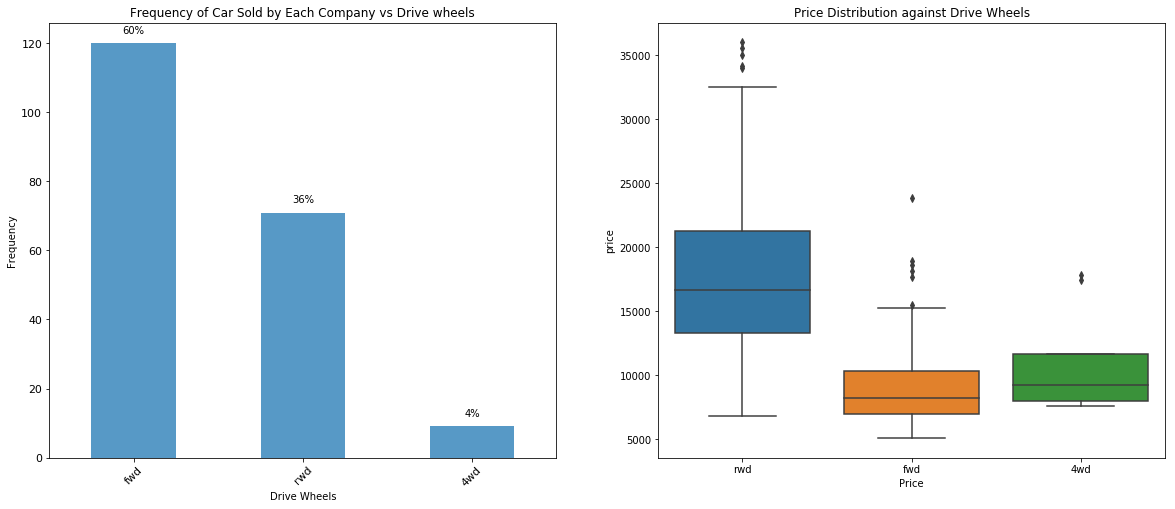

In [38]:
#Visualize Cars sold against drivewheel and their price distributon

plt.figure(figsize=(20,8))
plt.subplot(121)
ax = car_df_without_price_outliers['drivewheel'].value_counts().plot(kind="bar",rot=45,alpha=0.75,fontsize = 11)
for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:.0%}'.format(height/len(car_df_without_price_outliers)),
            ha="center") 
plt.title('Frequency of Car Sold by Each Company vs Drive wheels')
plt.xlabel('Drive Wheels')
plt.ylabel('Frequency')
plt.subplot(122)
sns.boxplot(y='price', x='drivewheel', data=car_df_without_price_outliers)
plt.title('Price Distribution against Drive Wheels')
plt.xlabel('Price')
plt.show()


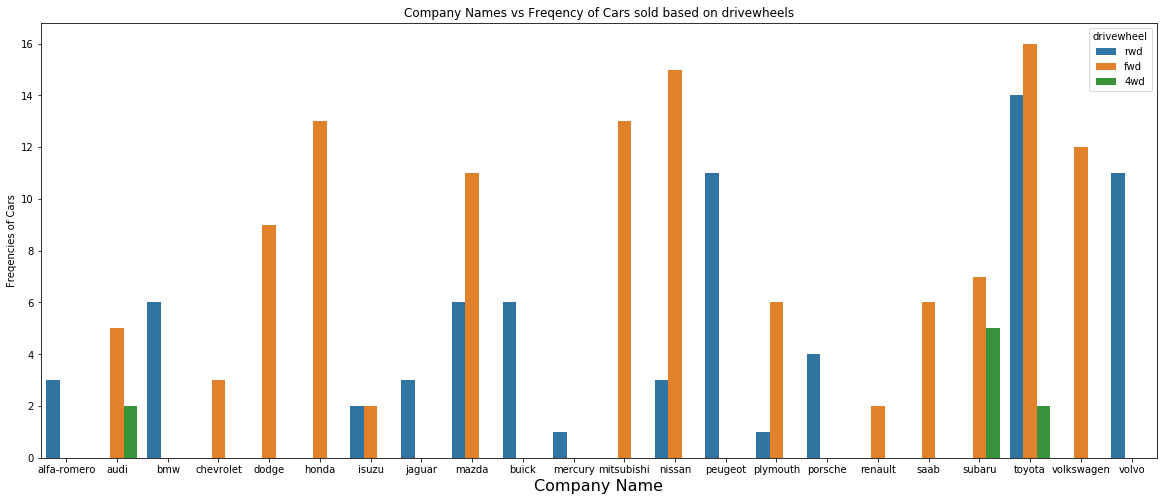

In [39]:
#Lets now see if car's drive wheels plays any role behind more sales of jaguar, porsche and bmw
plt.figure(figsize=(20,8))
sns.countplot(x='CompanyName', hue='drivewheel', data = car_df_without_price_outliers)
plt.title('Company Names vs Freqency of Cars sold based on drivewheels')
plt.xlabel('Company Name', fontsize=16)
plt.ylabel('Freqencies of Cars')
plt.show()

Insights - I see that Jaguar, Porsche and BMW sells only cars with rear drive wheels. So this is one of reason of their highest sale in the market.
Also toyota sells more fwd cars than rwd. But they sell more rwd cars also than jaguar, porsche and BMW. Even then it is not able to make much money. 

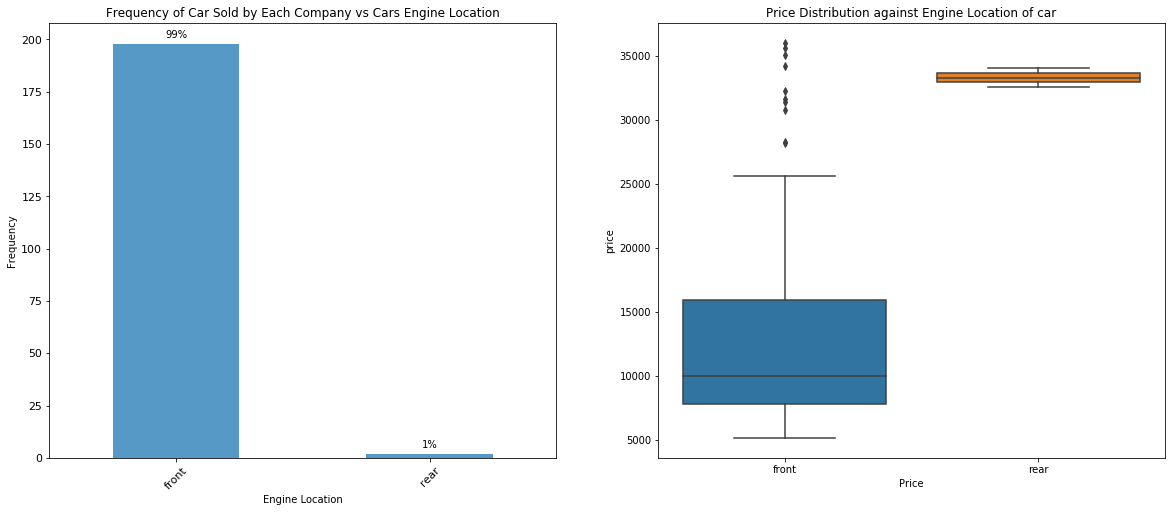

In [40]:
#Visualize Cars sold against car's Engine Location and their price distributon

plt.figure(figsize=(20,8))
plt.subplot(121)
ax = car_df_without_price_outliers['enginelocation'].value_counts().plot(kind="bar",rot=45,alpha=0.75,fontsize = 11)
for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:.0%}'.format(height/len(car_df_without_price_outliers)),
            ha="center") 
plt.title('Frequency of Car Sold by Each Company vs Cars Engine Location')
plt.xlabel('Engine Location')
plt.ylabel('Frequency')
plt.subplot(122)
sns.boxplot(y='price', x='enginelocation', data=car_df_without_price_outliers)
plt.title('Price Distribution against Engine Location of car')
plt.xlabel('Price')
plt.show()


Insights - I see that 99% of sold cars have engine in front. And only 1% of cars have rear engine.
But If I see the price cars with rear engine are sold at a much higher price than front engine cars.


In [41]:
#Lets find out mean selling price of front and rear engine cars
car_df_without_price_outliers.groupby('enginelocation')['price'].mean()

enginelocation
front    12391.851854
rear     33278.000000
Name: price, dtype: float64

#I see that rear engine cars has made almost thrice the money as front engine cars even though their sale is only 1%

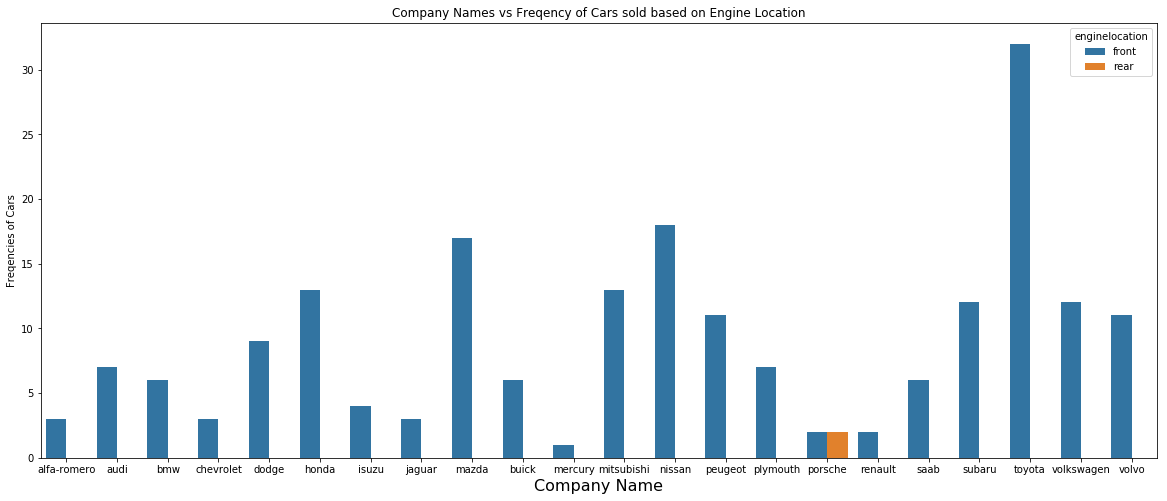

In [42]:
#Lets also see if car's engine location plays any role behind more sales of jaguar, porsche, bmw and toyota
plt.figure(figsize=(20,8))
sns.countplot(x='CompanyName', hue='enginelocation', data = car_df_without_price_outliers)
plt.title('Company Names vs Freqency of Cars sold based on Engine Location')
plt.xlabel('Company Name', fontsize=16)
plt.ylabel('Freqencies of Cars')
plt.show()

Its clear that only porsche sells cars with rear engines and hence the more sale.
But Jaguar, BMW and toyota sell only cars with front engine but still a wide difference between the sales.

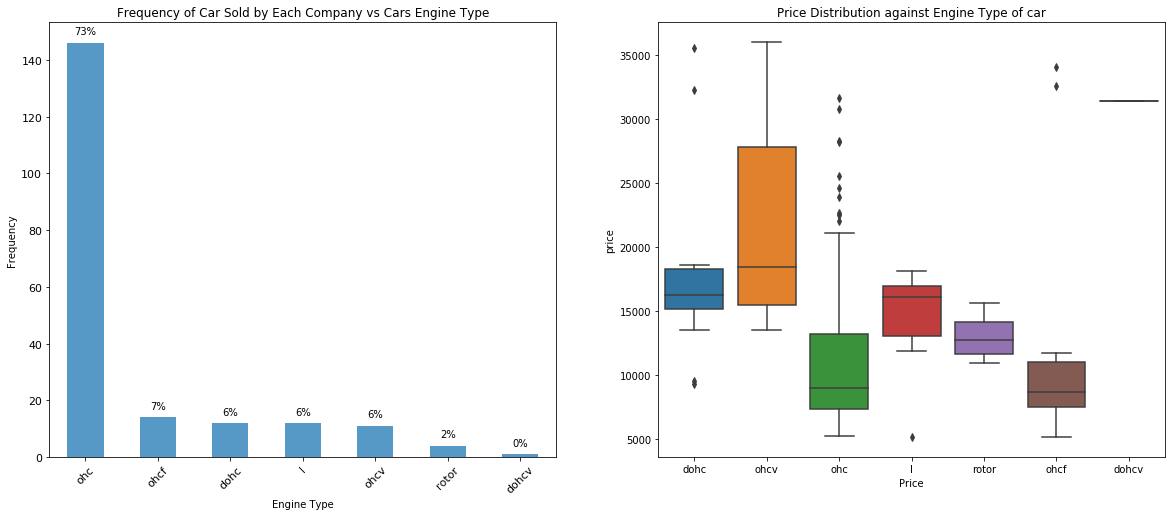

In [43]:
#Visualize Cars sold against car's Engine Type and their price distributon

plt.figure(figsize=(20,8))
plt.subplot(121)
ax = car_df_without_price_outliers['enginetype'].value_counts().plot(kind="bar",rot=45,alpha=0.75,fontsize = 11)
for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:.0%}'.format(height/len(car_df_without_price_outliers)),
            ha="center") 
plt.title('Frequency of Car Sold by Each Company vs Cars Engine Type')
plt.xlabel('Engine Type')
plt.ylabel('Frequency')
plt.subplot(122)
sns.boxplot(y='price', x='enginetype', data=car_df_without_price_outliers)
plt.title('Price Distribution against Engine Type of car')
plt.xlabel('Price')
plt.show()


Cars with dohcv are sold almost 0% but they make the highest money in the market follwed by ohcv which are sold only 6% in the market.


In [44]:
#Average money made by cars with each engine type

car_df_without_price_outliers.groupby('enginetype')['price'].mean()

enginetype
dohc     18116.416667
dohcv    31400.500000
l        14627.583333
ohc      11197.014842
ohcf     12075.071429
ohcv     21810.818182
rotor    13020.000000
Name: price, dtype: float64

Interesting point is - ohc cars are sold 73% in the market but their average selling is only Rs. 11197 which is very less.

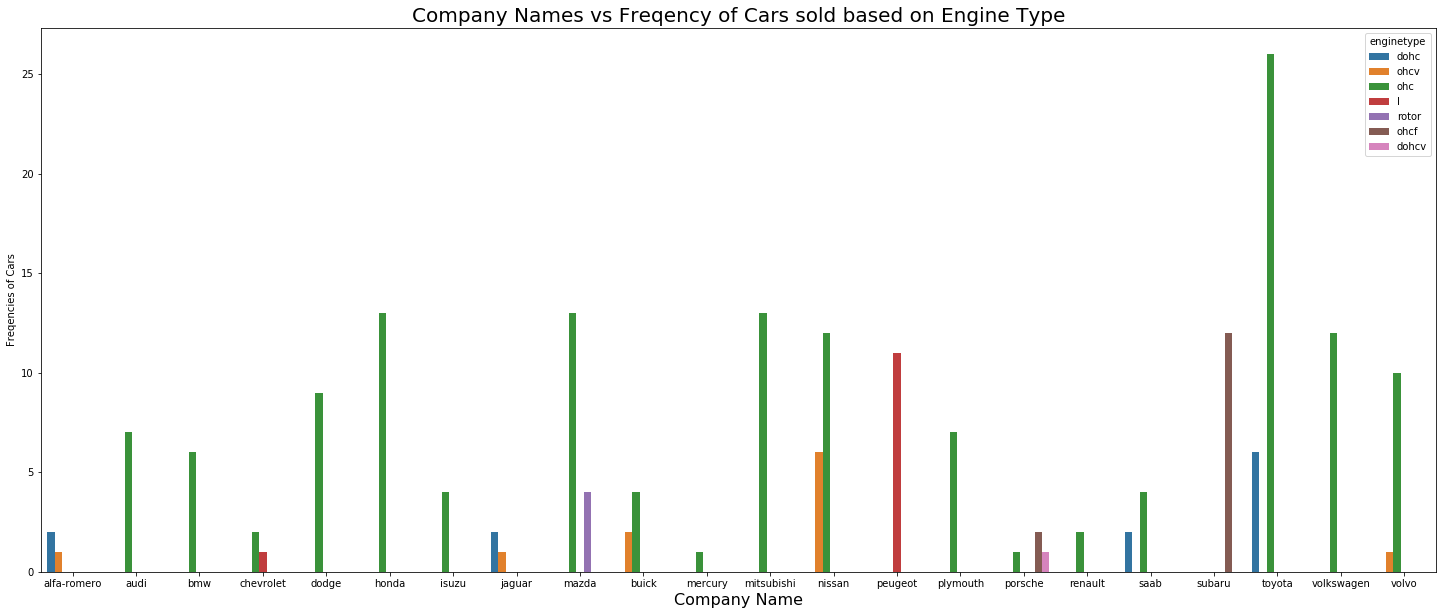

In [45]:
#Lets also see if car's engine Type plays any role behind more sales of jaguar, porsche, bmw and toyota
plt.figure(figsize=(25,10))
sns.countplot(x='CompanyName', hue='enginetype', data = car_df_without_price_outliers)
plt.title('Company Names vs Freqency of Cars sold based on Engine Type', fontsize=20)
plt.xlabel('Company Name', fontsize=16)
plt.ylabel('Freqencies of Cars')
plt.show()

Insights - 

1. Toyota sells the most odhc cars which explains the low sales.
2. Porsche sales dohcv cars which explains the highest sales.
3. Jaguar sales only dohc and ohcv cars which also explain the highest sales.
4. But BMW sells only ohc cars but still make more money than toyota.

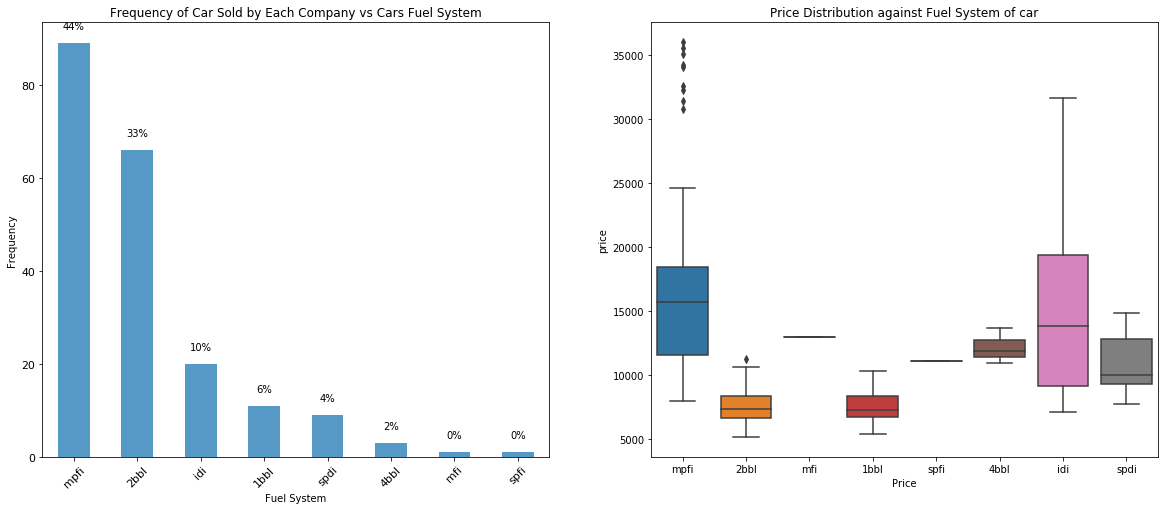

In [46]:
#Visualize Cars sold against car's Fuel System and their price distributon

plt.figure(figsize=(20,8))
plt.subplot(121)
ax = car_df_without_price_outliers['fuelsystem'].value_counts().plot(kind="bar",rot=45,alpha=0.75,fontsize = 11)
for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:.0%}'.format(height/len(car_df_without_price_outliers)),
            ha="center") 
plt.title('Frequency of Car Sold by Each Company vs Cars Fuel System')
plt.xlabel('Fuel System')
plt.ylabel('Frequency')
plt.subplot(122)
sns.boxplot(y='price', x='fuelsystem', data=car_df_without_price_outliers)
plt.title('Price Distribution against Fuel System of car')
plt.xlabel('Price')
plt.show()

Insights -
1. mpfi cars are sold more which also explains the reason of most selling price

In [47]:
#Mean selling price of cars with each fuel system

car_df_without_price_outliers.groupby('fuelsystem')['price'].mean()

fuelsystem
1bbl     7555.545455
2bbl     7478.151515
4bbl    12145.000000
idi     15838.150000
mfi     12964.000000
mpfi    16487.074910
spdi    10990.444444
spfi    11048.000000
Name: price, dtype: float64

1 interesting thing to note here is idi cars are sold only 10% which is much lower than sales of mpfi (44%) but still their average sale price is almost same.

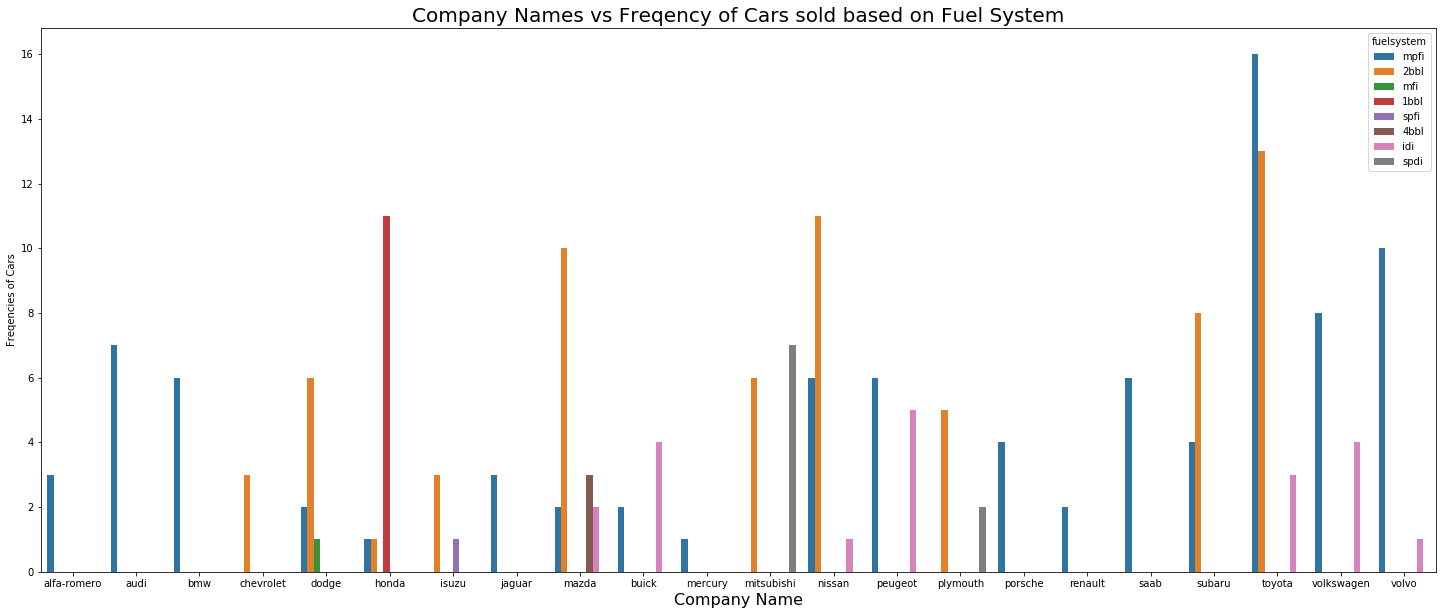

In [48]:
#Lets also see if car's fuelsystem plays any role behind more sales of jaguar, porsche, bmw and toyota
plt.figure(figsize=(25,10))
sns.countplot(x='CompanyName', hue='fuelsystem', data = car_df_without_price_outliers)
plt.title('Company Names vs Freqency of Cars sold based on Fuel System', fontsize=20)
plt.xlabel('Company Name', fontsize=16)
plt.ylabel('Freqencies of Cars')
plt.show()

#Insights - 
1. Toyota sells the most mpfi cars.
2. Jaguar, BMW and porsche only sells mpfi cars.

In [ ]:
#After checking Data dictionary, I came to know that symboling is a categorical variable 
#with -3 showing pretty safe insurance rating with 3 stating a risky automobile.
#Lets plot and see the distribution against this column.

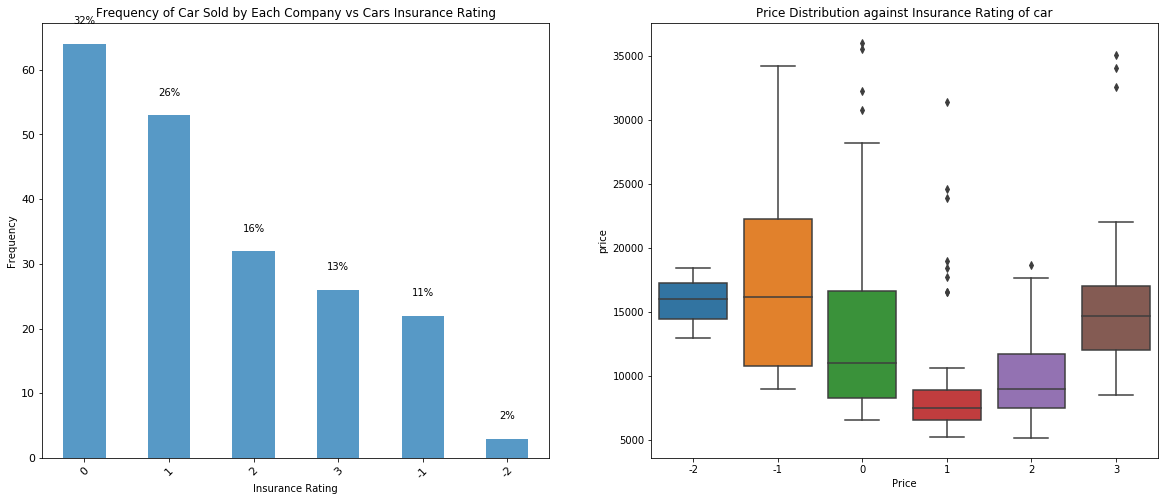

In [49]:
#Visualize Cars sold against car's insurance rating and their price distributon
plt.figure(figsize=(20,8))
plt.subplot(121)
ax = car_df_without_price_outliers['symboling'].value_counts().plot(kind="bar",rot=45,alpha=0.75,fontsize = 11)
for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:.0%}'.format(height/len(car_df_without_price_outliers)),
            ha="center") 
plt.title('Frequency of Car Sold by Each Company vs Cars Insurance Rating')
plt.xlabel('Insurance Rating')
plt.ylabel('Frequency')
plt.subplot(122)
sns.boxplot(y='price', x='symboling', data=car_df_without_price_outliers)
plt.title('Price Distribution against Insurance Rating of car')
plt.xlabel('Price')
plt.show()



In [ ]:
#Insights - I see that cars with mid risk i.e. rating -1,0 and 1 are sold more.
#with this it is also clear more the box plot that cars with mid risk rating are making more money.
#Lets create a new category with Insurance risk name and see if this variable is able to explain the high 
#selling price of Jaguar, porsche and BMW.

In [50]:
#If symboling is -2 or -3 then risk=low, if symboling is -1,0 and 1 then risk = mid and if symboling=2 or 3 then risk=high
def check_risk(rating):
    if(rating<=-2):
        return "low"
    elif(rating<=1):
        return "mid"
    else:
        return "high"
car_df_without_price_outliers['Insurance_Risk'] = car_df_without_price_outliers['symboling'].apply(lambda x: check_risk(x))
car_df_without_price_outliers.head()

,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,price,fuel_economy,Insurance_Risk
0,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,13495.0,23.70,high
1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,16500.0,23.70,high
2,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,16500.0,22.15,mid
3,2,audi,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500,13950.0,26.70,high
4,2,audi,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500,17450.0,19.80,high


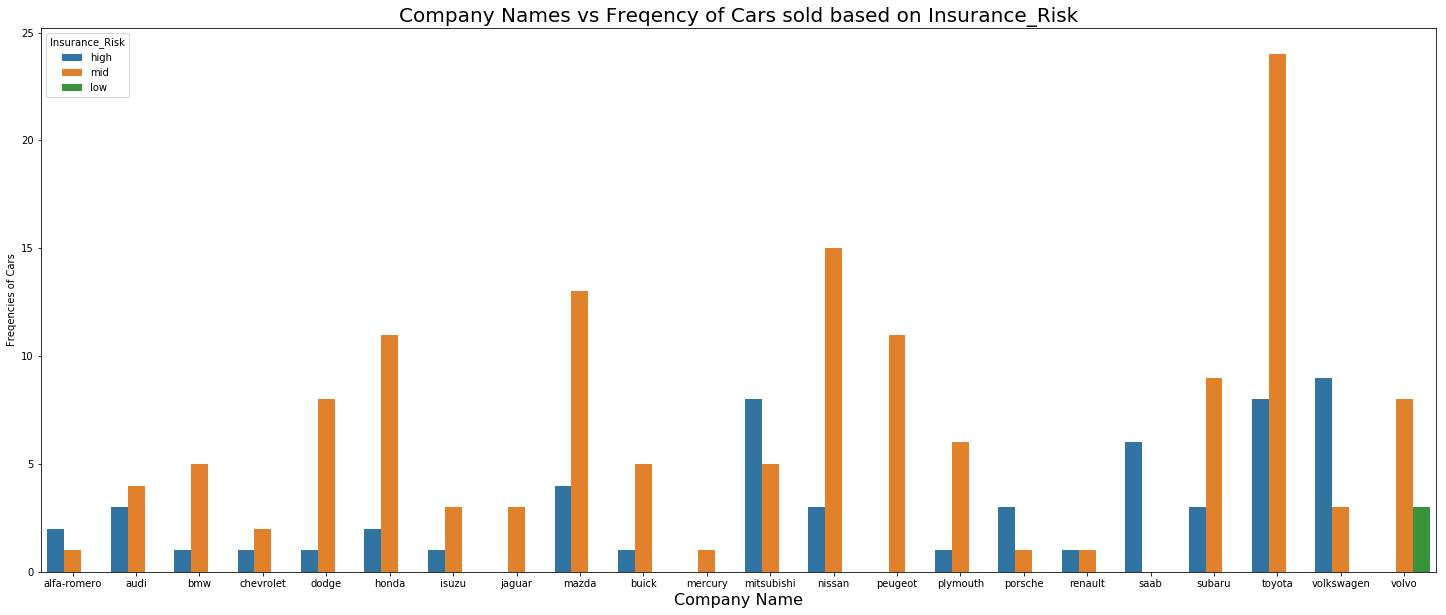

In [51]:
#Lets also see if car's insurance_risk plays any role behind more sales of jaguar, porsche, bmw and toyota
plt.figure(figsize=(25,10))
sns.countplot(x='CompanyName', hue='Insurance_Risk', data = car_df_without_price_outliers)
plt.title('Company Names vs Freqency of Cars sold based on Insurance_Risk', fontsize=20)
plt.xlabel('Company Name', fontsize=16)
plt.ylabel('Freqencies of Cars')
plt.show()

In [58]:
#Insights - I see that Toyota sells both mid risk and high risk cars.
#Porsche also sells mid risk and high risk cars but the ratio is it sells more high risk cars.
#Jaguar cars falls under mid-risk always.
#BMW sells more mid-risk cars than high risk.
#Volvo is the only company which sells low risk automobiles.

In [52]:
#Lets now see numeric variables in our dataset
car_df_without_price_outliers.select_dtypes(include=['int32','int64','float64', 'float32']).columns.values

array(['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'cylindernumber', 'enginesize',
       'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm',
       'price', 'fuel_economy'], dtype=object)

<Figure size 1440x1440 with 0 Axes>

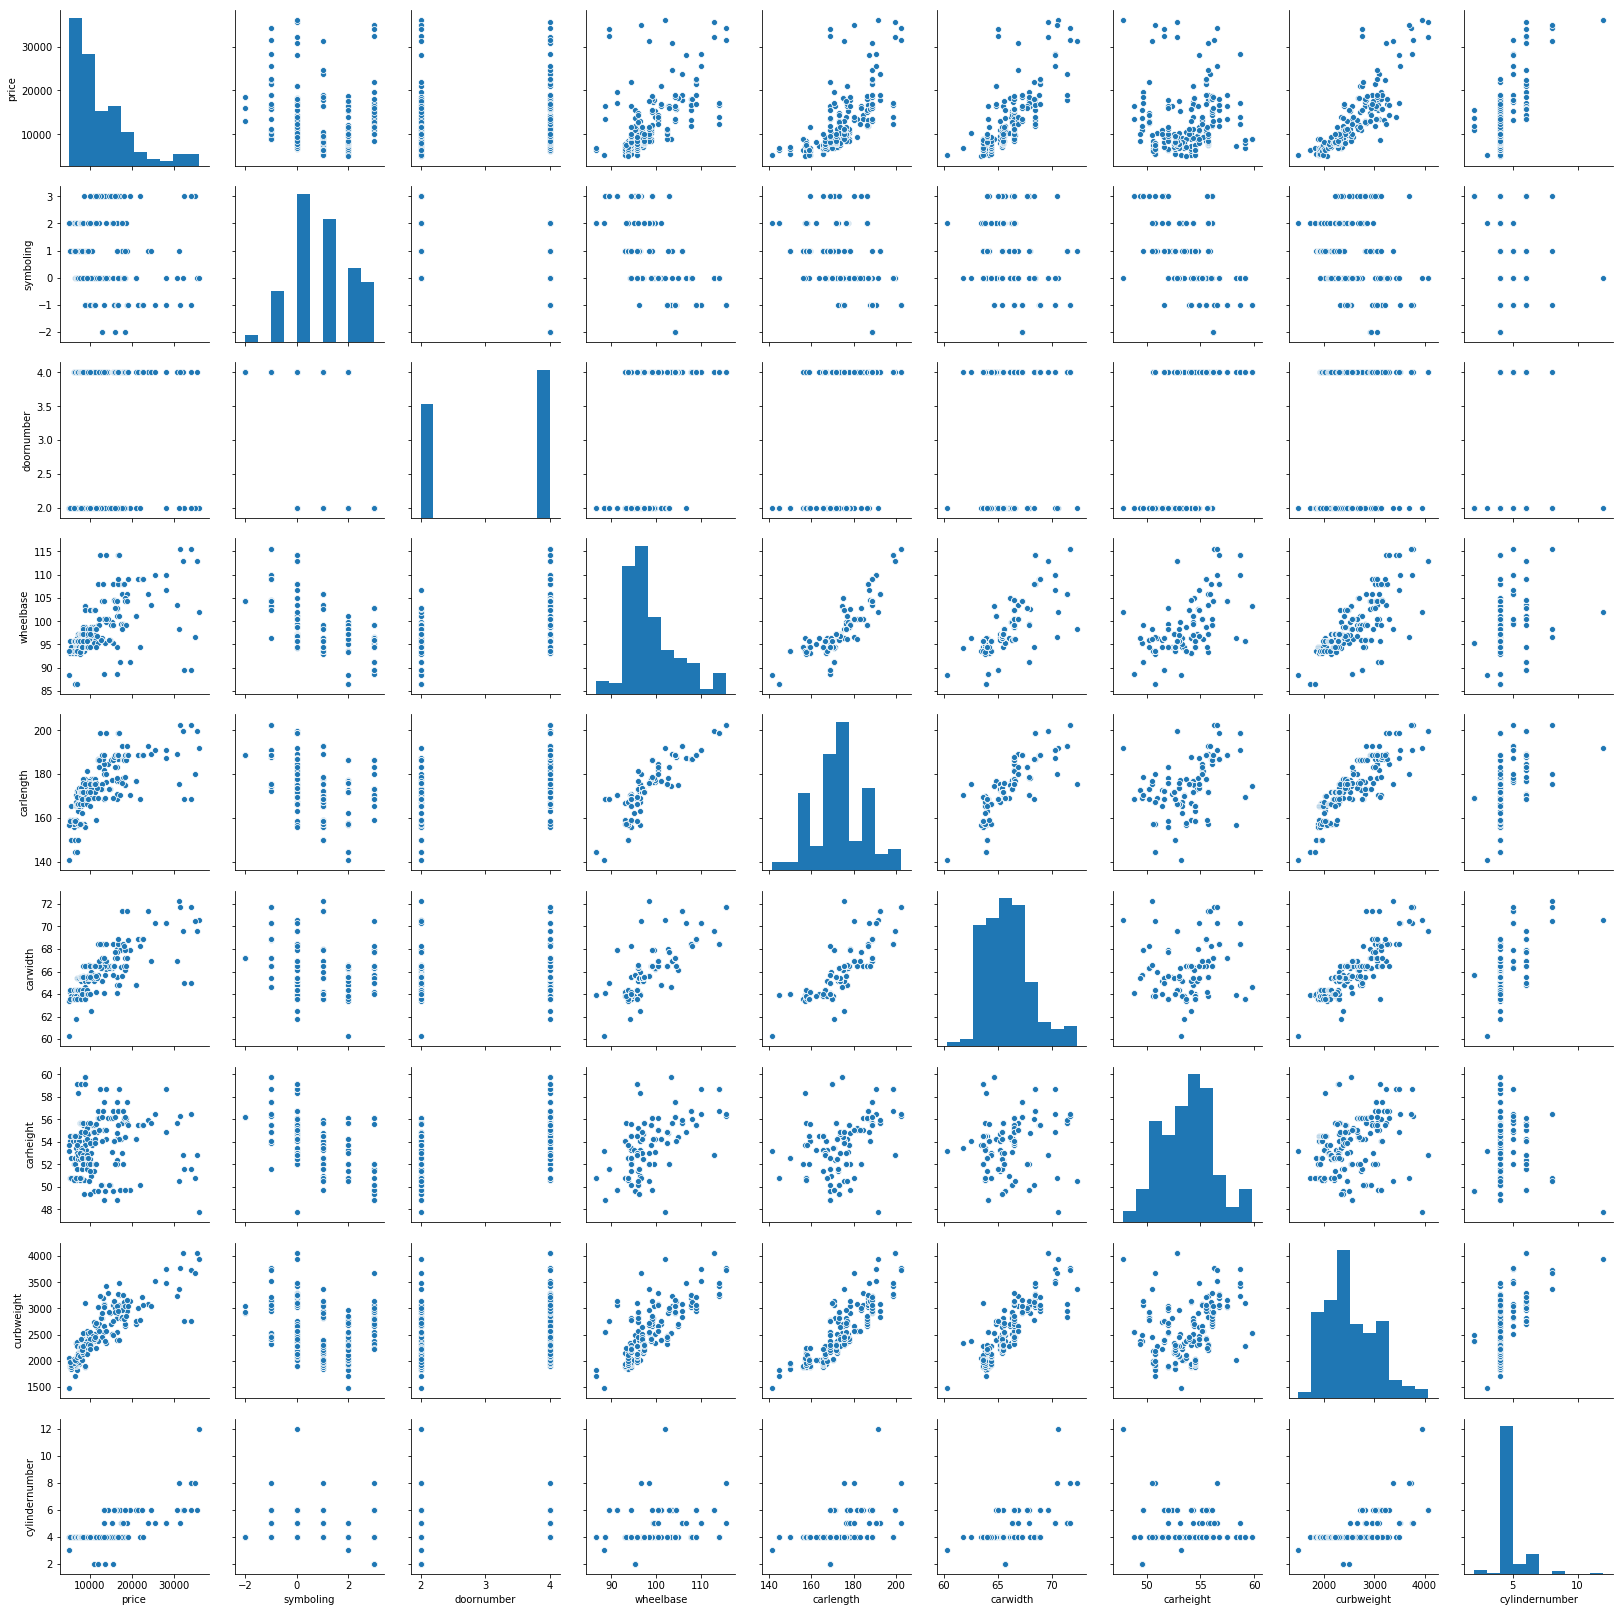

In [53]:
#Lets create a pair plot to understand the distribution of each numeric variable against price - First 9 numeric variables
plt.figure(figsize=(20,20))
sns.pairplot(data=car_df_without_price_outliers,vars=[ 'price','symboling','doornumber','wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight','cylindernumber'])
plt.show()

In [128]:
#I see that carlength, carwidth, cylindernumber and curbweight are able to explain the price distribution based on them upto an extent.
#Lets now plot for rest of the numeric variable.

<Figure size 1440x1440 with 0 Axes>

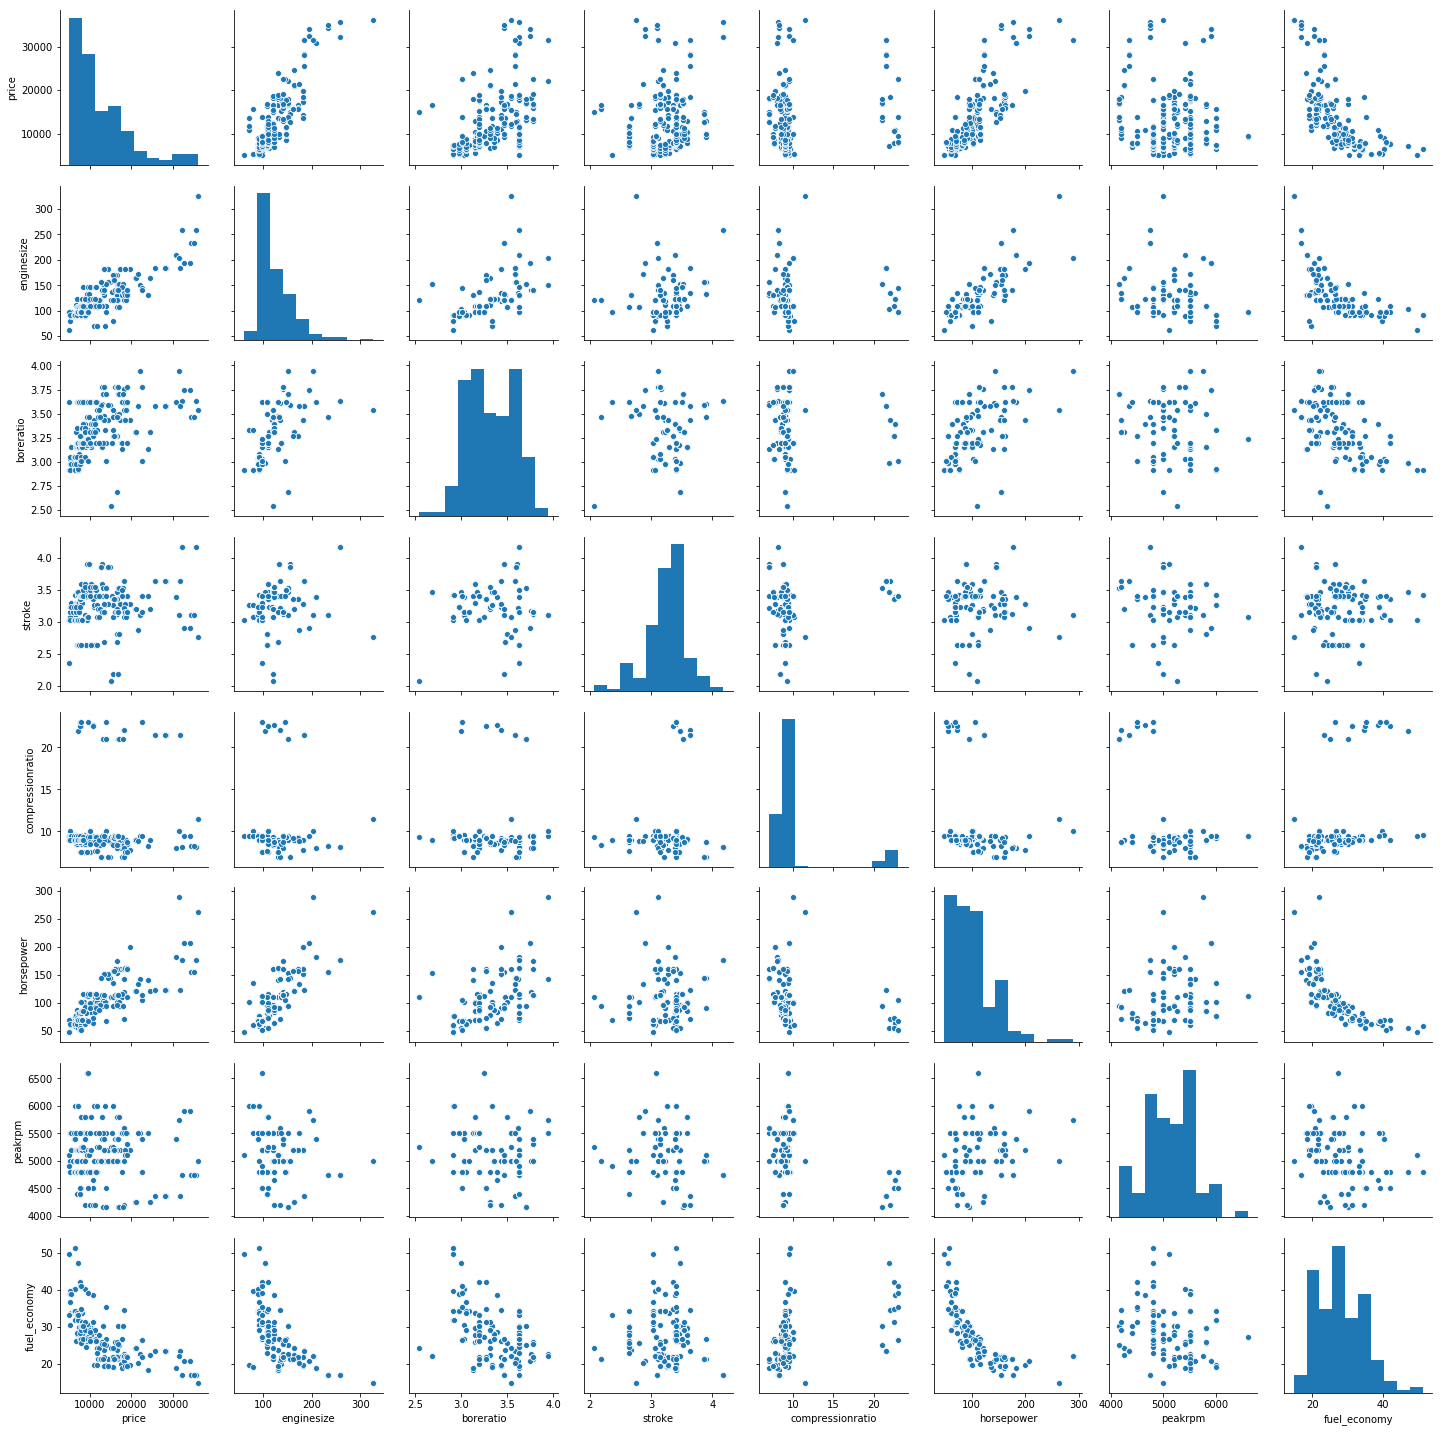

In [54]:
#Lets create a pair plot to understand the distribution of each numeric variable against price - First 9 numeric variables
plt.figure(figsize=(20,20))
sns.pairplot(data=car_df_without_price_outliers,vars=[ 'price','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','fuel_economy'])
plt.show()

In [130]:
#I found that enginesize, horsepower and fuel_economy are able able to explain price distribution upto an extent.
#Out of which enginesize and horsepower has a positive relationship with price but fuel_economy has an inverse relationship 
#with price.

In [55]:
#Lets now see the correlation of above numeric variables with price

correlation_metric = car_df_without_price_outliers[['carlength','carwidth','curbweight','boreratio','enginesize','horsepower','fuel_economy','cylindernumber','price']].corr()
correlation_metric

,carlength,carwidth,curbweight,boreratio,enginesize,horsepower,fuel_economy,cylindernumber,price
carlength,1.000000,0.827266,0.868086,0.591532,0.658936,0.528850,-0.673882,0.371306,0.677666
carwidth,0.827266,1.000000,0.857629,0.540573,0.712615,0.627511,-0.643521,0.493962,0.768299
curbweight,0.868086,0.857629,1.000000,0.629384,0.850809,0.736628,-0.766136,0.566649,0.850567
boreratio,0.591532,0.540573,0.629384,1.000000,0.559419,0.543129,-0.565788,0.161904,0.525666
enginesize,0.658936,0.712615,0.850809,0.559419,1.000000,0.805563,-0.649635,0.817883,0.849692
horsepower,0.528850,0.627511,0.736628,0.543129,0.805563,1.000000,-0.780705,0.660742,0.794327
fuel_economy,-0.673882,-0.643521,-0.766136,-0.565788,-0.649635,-0.780705,1.000000,-0.407274,-0.688694
cylindernumber,0.371306,0.493962,0.566649,0.161904,0.817883,0.660742,-0.407274,1.000000,0.670454
price,0.677666,0.768299,0.850567,0.525666,0.849692,0.794327,-0.688694,0.670454,1.000000


Insights -
1. I see that there is a strong relationship between our found 7 variables with price.
2. I also see that there is a strong relationship in between all our variables that means high multicollinearity is present.

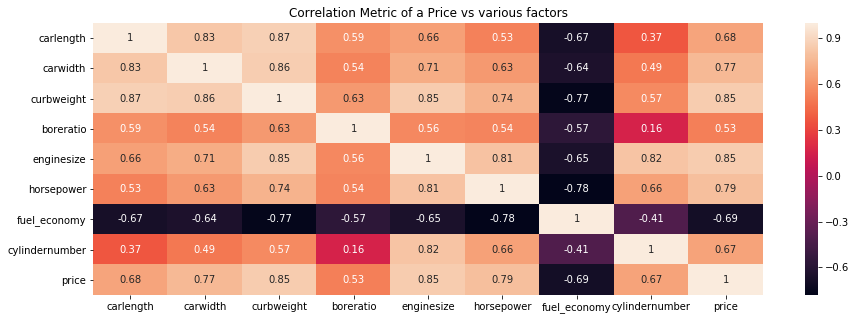

In [56]:
#Lets now plot heatmap bwteen above 7 variables and price

plt.figure(figsize=(15,5))
sns.heatmap(correlation_metric, xticklabels=correlation_metric.columns, yticklabels=correlation_metric.columns,annot=True)
plt.title("Correlation Metric of a Price vs various factors")
plt.show()

In [ ]:
#I found that fuel economy is inversely related with rest if the variables. 
#But there is a high relationship between rest of other variable.

# Data Modelling - 
As we have found all our driver variables, lets proceed towards data modelling

# Scaling

In [58]:
#Create a backup of previous stage
car_df_to_model = car_df_without_price_outliers.copy()

In [59]:
# Take only required variables
car_df_to_scale = car_df_to_model[['CompanyName', 'fueltype','aspiration','carbody','drivewheel','enginelocation','Insurance_Risk','enginetype','fuelsystem','carlength','carwidth','curbweight','enginesize','horsepower','boreratio','fuel_economy','cylindernumber','price']]

In [60]:
#Lets now see datatypes of our scaled variables - fueltype, aspiration and enginelocation
car_df_to_scale.dtypes

CompanyName        object
fueltype           object
aspiration         object
carbody            object
drivewheel         object
enginelocation     object
Insurance_Risk     object
enginetype         object
fuelsystem         object
carlength         float64
carwidth          float64
curbweight          int64
enginesize          int64
horsepower          int64
boreratio         float64
fuel_economy      float64
cylindernumber      int64
price             float64
dtype: object

In [61]:
#Lets see sample records
car_df_to_scale.head()

,CompanyName,fueltype,aspiration,carbody,drivewheel,enginelocation,Insurance_Risk,enginetype,fuelsystem,carlength,carwidth,curbweight,enginesize,horsepower,boreratio,fuel_economy,cylindernumber,price
0,alfa-romero,gas,std,convertible,rwd,front,high,dohc,mpfi,168.8,64.1,2548,130,111,3.47,23.70,4,13495.0
1,alfa-romero,gas,std,convertible,rwd,front,high,dohc,mpfi,168.8,64.1,2548,130,111,3.47,23.70,4,16500.0
2,alfa-romero,gas,std,hatchback,rwd,front,mid,ohcv,mpfi,171.2,65.5,2823,152,154,2.68,22.15,6,16500.0
3,audi,gas,std,sedan,fwd,front,high,ohc,mpfi,176.6,66.2,2337,109,102,3.19,26.70,4,13950.0
4,audi,gas,std,sedan,4wd,front,high,ohc,mpfi,176.6,66.4,2824,136,115,3.19,19.80,5,17450.0


In [62]:
#Create dummy variables for rest of categorical variables - Company Name, carbody, drivewheel, enginetype and fuelsystem
car_cname = pd.get_dummies(car_df_to_scale['CompanyName'], drop_first=True)
car_carbody = pd.get_dummies(car_df_to_scale['carbody'], drop_first=True)
car_drivewheel = pd.get_dummies(car_df_to_scale['drivewheel'], drop_first=True)
car_enginetype = pd.get_dummies(car_df_to_scale['enginetype'], drop_first=True)
car_fuelsys = pd.get_dummies(car_df_to_scale['fuelsystem'], drop_first=True)
car_fueltype = pd.get_dummies(car_df_to_scale['fueltype'], drop_first=True)
car_aspiration = pd.get_dummies(car_df_to_scale['aspiration'], drop_first=True)
car_enginelocation = pd.get_dummies(car_df_to_scale['enginelocation'], drop_first=True)
car_risk = pd.get_dummies(car_df_to_scale['Insurance_Risk'], drop_first=True)


car_df_to_scale = pd.concat([car_df_to_scale, car_cname, car_carbody, car_drivewheel, car_enginetype, car_fuelsys, car_fueltype,car_aspiration,car_enginelocation,car_risk], axis=1)
#Lets drop - Company Name, carbody, drivewheel, enginetype and fuelsystem
car_df_to_scale.drop(['CompanyName','carbody','drivewheel','enginetype','fuelsystem','fueltype','aspiration','enginelocation','Insurance_Risk'], axis=1, inplace=True)
car_df_to_scale.head()

,carlength,carwidth,curbweight,enginesize,horsepower,boreratio,fuel_economy,cylindernumber,price,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,gas,turbo,rear,low,mid
0,168.8,64.1,2548,130,111,3.47,23.70,4,13495.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,168.8,64.1,2548,130,111,3.47,23.70,4,16500.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
2,171.2,65.5,2823,152,154,2.68,22.15,6,16500.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1
3,176.6,66.2,2337,109,102,3.19,26.70,4,13950.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
4,176.6,66.4,2824,136,115,3.19,19.80,5,17450.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


# Model Building

In [63]:
# Create Train and Test Datasets

from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(car_df_to_scale, train_size=0.7, random_state=True)
print('Shape of Train dataset: ', df_train.shape)
print('Shape of Test dataset: ', df_test.shape)

Shape of Train dataset:  (140, 54)
Shape of Test dataset:  (60, 54)


In [64]:
#Scale numeric features
num_vars = ['carlength', 'carwidth', 'curbweight','enginesize','horsepower','fuel_economy','boreratio','cylindernumber','price']
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

C:\Users\vpapn\AppData\Local\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,carlength,carwidth,curbweight,enginesize,horsepower,boreratio,fuel_economy,cylindernumber,price,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,gas,turbo,rear,low,mid
120,0.138783,0.202020,0.058322,0.106383,0.085526,0.307143,0.569787,0.333333,0.036508,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
69,0.712928,0.858586,0.743831,0.601064,0.447368,0.742857,0.215107,0.500000,0.757689,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1
82,0.441065,0.454545,0.446837,0.457447,0.592105,0.742857,0.146141,0.333333,0.246813,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0
44,0.112167,0.181818,0.016599,0.106383,0.098684,0.350000,0.770115,0.333333,0.124819,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
19,0.112167,0.181818,0.016599,0.106383,0.098684,0.350000,0.770115,0.333333,0.038676,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1


In [65]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [66]:
#Lets create y_train and X_train
y_train = df_train.pop('price')
X_train = df_train

In [67]:
#Find top 15 variables using RFE which are useful to predict price of a car
lm= LinearRegression()
lm.fit(X_train,y_train)

rfe = RFE(lm,15)
rfe=rfe.fit(X_train,y_train)

In [68]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('carlength', True, 1),
 ('carwidth', True, 1),
 ('curbweight', True, 1),
 ('enginesize', False, 11),
 ('horsepower', True, 1),
 ('boreratio', False, 5),
 ('fuel_economy', False, 12),
 ('cylindernumber', False, 33),
 ('audi', False, 3),
 ('bmw', True, 1),
 ('buick', True, 1),
 ('chevrolet', False, 36),
 ('dodge', False, 26),
 ('honda', False, 22),
 ('isuzu', False, 7),
 ('jaguar', True, 1),
 ('mazda', False, 6),
 ('mercury', False, 17),
 ('mitsubishi', False, 10),
 ('nissan', False, 34),
 ('peugeot', False, 28),
 ('plymouth', False, 16),
 ('porsche', True, 1),
 ('renault', False, 29),
 ('saab', False, 2),
 ('subaru', True, 1),
 ('toyota', False, 30),
 ('volkswagen', False, 19),
 ('volvo', False, 4),
 ('hardtop', True, 1),
 ('hatchback', True, 1),
 ('sedan', True, 1),
 ('wagon', True, 1),
 ('fwd', False, 24),
 ('rwd', False, 14),
 ('dohcv', False, 39),
 ('l', False, 23),
 ('ohc', False, 32),
 ('ohcf', True, 1),
 ('ohcv', False, 31),
 ('rotor', False, 13),
 ('2bbl', False, 35),
 ('4bbl'

In [69]:
#List only top 15 variables
col = X_train.columns[rfe.support_]
col

Index(['carlength', 'carwidth', 'curbweight', 'horsepower', 'bmw', 'buick',
       'jaguar', 'porsche', 'subaru', 'hardtop', 'hatchback', 'sedan', 'wagon',
       'ohcf', 'rear'],
      dtype='object')

In [70]:
X_train[col].corr()

,carlength,carwidth,curbweight,horsepower,bmw,buick,jaguar,porsche,subaru,hardtop,hatchback,sedan,wagon,ohcf,rear
carlength,1.000000,0.844900,0.853748,0.556989,0.095076,0.285730,0.275609,-0.049064,-0.129359,0.051921,-0.416263,0.231805,0.233478,-0.134635,-0.034568
carwidth,0.844900,1.000000,0.847210,0.596661,-0.040294,0.460356,0.227050,0.050854,-0.129150,0.085759,-0.213954,0.112127,0.092487,-0.134134,-0.033605
curbweight,0.853748,0.847210,1.000000,0.740720,0.088209,0.443034,0.382018,0.059936,-0.110974,0.123047,-0.256753,0.056646,0.160993,-0.093603,0.040307
horsepower,0.556989,0.596661,0.740720,1.000000,0.158125,0.166795,0.272121,0.268520,-0.120455,0.213522,-0.000032,-0.030733,-0.107371,-0.030675,0.270365
bmw,0.095076,-0.040294,0.088209,0.158125,1.000000,-0.033005,-0.020646,-0.020646,-0.047565,-0.025378,-0.127827,0.181595,-0.063758,-0.050080,-0.014546
buick,0.285730,0.460356,0.443034,0.166795,-0.033005,1.000000,-0.023168,-0.023168,-0.053376,0.237322,-0.143444,-0.027538,0.046295,-0.056198,-0.016323
jaguar,0.275609,0.227050,0.382018,0.272121,-0.020646,-0.023168,1.000000,-0.014493,-0.033389,-0.017815,-0.089730,0.127473,-0.044756,-0.035154,-0.010211
porsche,-0.049064,0.050854,0.059936,0.268520,-0.020646,-0.023168,-0.014493,1.000000,-0.033389,0.397859,0.035892,-0.113692,-0.044756,0.188554,0.704559
subaru,-0.129359,-0.129150,-0.110974,-0.120455,-0.047565,-0.053376,-0.033389,-0.033389,1.000000,-0.041042,-0.033076,-0.095247,0.236546,0.949788,-0.023525
hardtop,0.051921,0.085759,0.123047,0.213522,-0.025378,0.237322,-0.017815,0.397859,-0.041042,1.000000,-0.110297,-0.139751,-0.055014,0.140111,0.573182


In [71]:
#Create first model
X = X_train[col]
#import statsmodel.api for Model building
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X)
#I am using OLS method i.e. least square method to create a model
lm_model = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
print(lm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     144.5
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           5.18e-70
Time:                        11:05:29   Log-Likelihood:                 214.73
No. Observations:                 140   AIC:                            -399.5
Df Residuals:                     125   BIC:                            -355.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1002      0.031      3.281      0.0

In [72]:
#I see that carlength has highest p value- lets drop it and create a new model

X.drop('carlength',axis=1,inplace=True)

X_train_rfe = sm.add_constant(X)
lm_model2 = sm.OLS(y_train,X_train_rfe).fit()

print(lm_model2.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     155.9
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           5.69e-71
Time:                        11:05:52   Log-Likelihood:                 214.35
No. Observations:                 140   AIC:                            -400.7
Df Residuals:                     126   BIC:                            -359.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0980      0.030      3.227      0.0

In [ ]:
#Insight - All p values are under significance limit i.e. less than 0.05.
#Lets now check for multicollinearity in our model which can be found using VIF

In [73]:
#Import VIF library from statsmodels.stats.outliers_influence package.
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()

vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i ) for i in range(X.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,subaru,inf
12,ohcf,inf
13,rear,inf
1,curbweight,24.92
0,carwidth,22.66
2,horsepower,10.35
10,sedan,3.92
9,hatchback,2.72
6,porsche,2.11
11,wagon,2.08


I see that variables - subaru, ohcf and rear have VIF as inf which indicates strong multicollinearity.
Lets drop them one by one.

In [74]:
#lets remove subaru  

X = X.drop('subaru', axis=1)
X_train_rfe = sm.add_constant(X)
lm_model3 = sm.OLS(y_train,X_train_rfe).fit()
print(lm_model3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     155.9
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           5.69e-71
Time:                        11:06:09   Log-Likelihood:                 214.35
No. Observations:                 140   AIC:                            -400.7
Df Residuals:                     126   BIC:                            -359.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0980      0.030      3.227      0.0

In [ ]:
#Insights - After dropping subaru, pvalue of ohcf has been increased. Lets drop this variable and create a new model.

In [75]:
#Remove ohcf.

X = X.drop('ohcf', axis=1)

X_train_rfe= sm.add_constant(X)
lm_model4 = sm.OLS(y_train,X_train_rfe).fit()
print(lm_model4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     168.2
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           8.69e-72
Time:                        11:06:16   Log-Likelihood:                 213.56
No. Observations:                 140   AIC:                            -401.1
Df Residuals:                     127   BIC:                            -362.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0961      0.030      3.161      0.0

In [178]:
#Insights - All feature variables are under significant limit of pvalue now.
#Lets check for multicollinearity in the model now.

In [76]:
vif=pd.DataFrame()

vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i ) for i in range(X.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,curbweight,24.84
0,carwidth,22.60
2,horsepower,10.31
9,sedan,3.80
11,rear,2.76
8,hatchback,2.64
6,porsche,2.11
10,wagon,1.85
7,hardtop,1.76
4,buick,1.73


In [ ]:
#curbweight is with highest VIF now. Lets drop this and create a new model.

In [77]:
#Drop Curbweight

X = X.drop('curbweight', axis=1)
X_train_rfe = sm.add_constant(X)

lm_model5 = sm.OLS(y_train,X_train_rfe).fit()
print(lm_model5.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     163.1
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           1.13e-69
Time:                        11:06:35   Log-Likelihood:                 205.32
No. Observations:                 140   AIC:                            -386.6
Df Residuals:                     128   BIC:                            -351.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1095      0.032      3.433      0.0

In [ ]:
#Insights - pvalue of porsche has been increased to 0.05. Lets drop this. 
#As for a variable to be significant, its pvalue should be <0.05

In [78]:
X = X.drop('porsche', axis=1)
X_train_rfe = sm.add_constant(X)

lm_model6 = sm.OLS(y_train,X_train_rfe).fit()
print(lm_model6.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     169.4
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           4.03e-69
Time:                        11:06:40   Log-Likelihood:                 201.07
No. Observations:                 140   AIC:                            -380.1
Df Residuals:                     129   BIC:                            -347.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1052      0.033      3.213      0.0

In [ ]:
#Insights - All feature variables are with 0.00 pvalue that shows they are significant features to predict price of a car.
#Lets now again check for multicollinearity

In [79]:
vif=pd.DataFrame()

vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i ) for i in range(X.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,carwidth,12.46
1,horsepower,6.43
7,sedan,3.61
6,hatchback,2.35
8,wagon,1.77
5,hardtop,1.75
9,rear,1.73
3,buick,1.57
2,bmw,1.18
4,jaguar,1.14


In [207]:
#Insights - VIF of carwidth is highest. that shows the variable is strongly multicollinear.
#Lets drop carwidth now.


In [80]:
X = X.drop('carwidth', axis=1)
X_train_rfe = sm.add_constant(X)

lm_model7 = sm.OLS(y_train,X_train_rfe).fit()
print(lm_model7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     89.11
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           3.17e-51
Time:                        11:06:49   Log-Likelihood:                 153.55
No. Observations:                 140   AIC:                            -287.1
Df Residuals:                     130   BIC:                            -257.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1356      0.046      2.972      0.0

In [ ]:
#Insights - I found that after dropping carwidth my adjusted Rsquare value decreased to 85% from 92% which shows 
# carwidth is significant enough to be dropped.

In [81]:
#Lets now see which variable is highly correlated with carwidth out of our other variables using correlation metric
X_train[['carwidth','horsepower','sedan','hatchback','wagon','hardtop','rear','buick','bmw','jaguar']].corr()

,carwidth,horsepower,sedan,hatchback,wagon,hardtop,rear,buick,bmw,jaguar
carwidth,1.000000,0.596661,0.112127,-0.213954,0.092487,0.085759,-0.033605,0.460356,-0.040294,0.227050
horsepower,0.596661,1.000000,-0.030733,-0.000032,-0.107371,0.213522,0.270365,0.166795,0.158125,0.272121
sedan,0.112127,-0.030733,1.000000,-0.703914,-0.351098,-0.139751,-0.080103,-0.027538,0.181595,0.127473
hatchback,-0.213954,-0.000032,-0.703914,1.000000,-0.277099,-0.110297,-0.063220,-0.143444,-0.127827,-0.089730
wagon,0.092487,-0.107371,-0.351098,-0.277099,1.000000,-0.055014,-0.031533,0.046295,-0.063758,-0.044756
hardtop,0.085759,0.213522,-0.139751,-0.110297,-0.055014,1.000000,0.573182,0.237322,-0.025378,-0.017815
rear,-0.033605,0.270365,-0.080103,-0.063220,-0.031533,0.573182,1.000000,-0.016323,-0.014546,-0.010211
buick,0.460356,0.166795,-0.027538,-0.143444,0.046295,0.237322,-0.016323,1.000000,-0.033005,-0.023168
bmw,-0.040294,0.158125,0.181595,-0.127827,-0.063758,-0.025378,-0.014546,-0.033005,1.000000,-0.020646
jaguar,0.227050,0.272121,0.127473,-0.089730,-0.044756,-0.017815,-0.010211,-0.023168,-0.020646,1.000000


In [ ]:
#I see that horsepower is highly correlated with carwidth. But after removing horsepower I found that even that is making 
#adjusting Rsqaure to fall tremendously low. 
#Next most correlated variable is hardtop. Lets drop this and see if the new model is significant

In [82]:
X= X_train[['carwidth','jaguar','horsepower','sedan','hatchback','wagon','rear','bmw','buick']]
X_train_rfe = sm.add_constant(X)

lm_model8 = sm.OLS(y_train,X_train_rfe).fit()
print(lm_model8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     167.7
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           4.55e-67
Time:                        11:07:01   Log-Likelihood:                 193.09
No. Observations:                 140   AIC:                            -366.2
Df Residuals:                     130   BIC:                            -336.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0412      0.030      1.374      0.1

In [83]:
vif=pd.DataFrame()

vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i ) for i in range(X.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,carwidth,12.22
2,horsepower,6.43
3,sedan,3.49
4,hatchback,2.30
5,wagon,1.72
8,buick,1.53
6,rear,1.21
7,bmw,1.18
1,jaguar,1.14


In [84]:
#Again I can not drop carwidth and horsepower as they make adjusted Rsquare to fall tremendiously low. After checking correlation metric plotted above, 
#I found that sedan is one of the feature variable which is highly corrleated with carwidth and horsepower.
#Lets drop sedan now.

X = X.drop('sedan', axis=1)
X_train_rfe = sm.add_constant(X)

lm_model9 = sm.OLS(y_train,X_train_rfe).fit()
print(lm_model9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     175.7
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           3.62e-66
Time:                        11:07:21   Log-Likelihood:                 188.01
No. Observations:                 140   AIC:                            -358.0
Df Residuals:                     131   BIC:                            -331.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0404      0.015     -2.649      0.0

In [85]:
#After dropping sedan, pvalue of wagon has been increased beyond significance level. Lets drop this variable.
X = X.drop('wagon', axis=1)
X_train_rfe = sm.add_constant(X)

lm_model10 = sm.OLS(y_train,X_train_rfe).fit()
print(lm_model10.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     201.1
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           3.53e-67
Time:                        11:07:25   Log-Likelihood:                 187.62
No. Observations:                 140   AIC:                            -359.2
Df Residuals:                     132   BIC:                            -335.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0428      0.015     -2.861      0.0

In [86]:
#I see that pvalue of hatchback is 0.07 which is insignificant. Lets drop this variable.
X = X.drop('hatchback', axis=1)
X_train_rfe = sm.add_constant(X)

lm_model10 = sm.OLS(y_train,X_train_rfe).fit()
print(lm_model10.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     222.3
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           8.91e-67
Time:                        11:07:44   Log-Likelihood:                 183.71
No. Observations:                 140   AIC:                            -353.4
Df Residuals:                     133   BIC:                            -332.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0613      0.014     -4.474      0.0

In [ ]:
#As pvalue of all feature variable is 0.00 that means shows all variables are significant in our model.
#Lets check for VIF for each variable.

In [87]:
vif=pd.DataFrame()

vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i ) for i in range(X.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,horsepower,5.75
0,carwidth,5.54
5,buick,1.20
3,rear,1.18
4,bmw,1.10
1,jaguar,1.09


In [ ]:
#I can not drop carwidth and horsepower as they make adjusted Rsquare to fall tremendiously low.
#Lets check for correlation between all these variables.


In [88]:
X_train[['carwidth','jaguar','horsepower','rear','bmw','buick']].corr()

,carwidth,jaguar,horsepower,rear,bmw,buick
carwidth,1.000000,0.227050,0.596661,-0.033605,-0.040294,0.460356
jaguar,0.227050,1.000000,0.272121,-0.010211,-0.020646,-0.023168
horsepower,0.596661,0.272121,1.000000,0.270365,0.158125,0.166795
rear,-0.033605,-0.010211,0.270365,1.000000,-0.014546,-0.016323
bmw,-0.040294,-0.020646,0.158125,-0.014546,1.000000,-0.033005
buick,0.460356,-0.023168,0.166795,-0.016323,-0.033005,1.000000


In [ ]:
#After checking correlation metric plotted above, 
#I found that rear is one of the feature variable which is highly corrleated with horsepower.
#Lets drop rear now.

In [89]:
X = X.drop('rear', axis=1)
X_train_rfe = sm.add_constant(X)

lm_model11 = sm.OLS(y_train,X_train_rfe).fit()
print(lm_model11.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     193.1
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           2.01e-59
Time:                        11:08:06   Log-Likelihood:                 162.99
No. Observations:                 140   AIC:                            -314.0
Df Residuals:                     134   BIC:                            -296.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0569      0.016     -3.597      0.0

In [90]:
#pValue of all variables is 0.00 which means all variables in model are significant.
#Lets Check for VIF now

vif=pd.DataFrame()

vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i ) for i in range(X.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,carwidth,5.01
2,horsepower,4.89
4,buick,1.20
1,jaguar,1.08
3,bmw,1.08


In [91]:
#After trying dropping each variable one by one, I found that by removing any of the variable is making the adjusted Rsquare value falling tremendously.
#Which indicates that each of the significant variable is significant enough.
X= X
X_train_rfe = sm.add_constant(X)
lm_model12 = sm.OLS(y_train,X_train_rfe).fit()
print(lm_model12.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     193.1
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           2.01e-59
Time:                        11:08:20   Log-Likelihood:                 162.99
No. Observations:                 140   AIC:                            -314.0
Df Residuals:                     134   BIC:                            -296.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0569      0.016     -3.597      0.0

# Insights-
1. Adjusted Rsquare value of 87.4 shows that our model is able to explain 87.4% variance in data.
2. pValue of 0.00 for all feature variables in our model shows that all these variables are significant for our model.
3. Fstatistics of 193.1 shows that probability of F-statistics is closer to 0 which indicates that our overall model fit is good.

# Means linear equation to predict price is -

price = -0.0569 + 0.3604*carwidth + 0.4255*horsepower + 0.2803*bmw + 0.3362*buick + 0.3800*jaguar

# Residual Analysis

Text(0.5, 0, 'Errors')

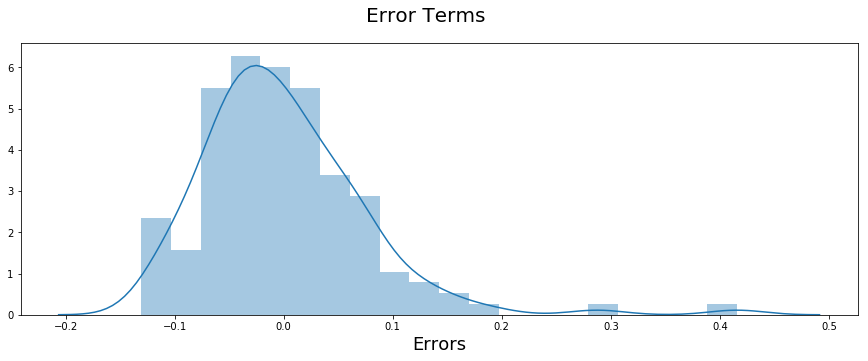

In [92]:
#Residual Analysis of train data
y_train_pred = lm_model12.predict(X_train_rfe)

fig = plt.figure(figsize=(15,5))
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

Error terms seems to be equally distributed with mean around 0

# Making Predictions

In [93]:
#Transform numeric variables of test dataset using learnt value from train dataset. 

df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()


,carlength,carwidth,curbweight,enginesize,horsepower,boreratio,fuel_economy,cylindernumber,price,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,gas,turbo,rear,low,mid
60,0.528517,0.474747,0.257066,0.276596,0.190789,0.607143,0.390805,0.333333,0.110969,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
42,0.363118,0.424242,0.204576,0.212766,0.296053,0.435714,0.357964,0.333333,0.171760,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
36,0.134981,0.212121,0.083894,0.117021,0.138158,0.271429,0.492611,0.333333,0.071537,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
106,0.541825,0.616162,0.584118,0.590426,0.690789,0.635714,0.160920,0.666667,0.436416,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1
189,0.176806,0.242424,0.187079,0.207447,0.230263,0.464286,0.310345,0.333333,0.212835,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [94]:
#Create X_test and y_test out of test dataset.

y_test = df_test.pop('price')
X_test = df_test

In [95]:
X_test = X_test[X.columns] #Taking only significant columns out of Model12
X_test.head()

,carwidth,jaguar,horsepower,bmw,buick
60,0.474747,0,0.190789,0,0
42,0.424242,0,0.296053,0,0
36,0.212121,0,0.138158,0,0
106,0.616162,0,0.690789,0,0
189,0.242424,0,0.230263,0,0


In [96]:
X_test_sm = sm.add_constant(X_test) #adding a constant to create a linear equation
y_test_pred = lm_model12.predict(X_test_sm) #Predicting using our final model lm_model12

# Model Evaluation

Text(0, 0.5, 'y_test_pred')

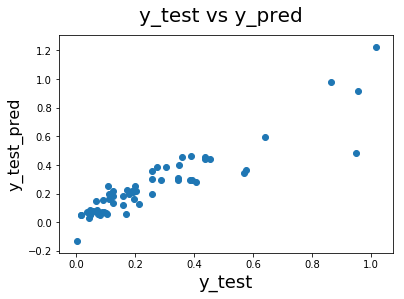

In [97]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_test_pred', fontsize=16)                          # Y-label

In [333]:
#Insights - The Model evaluation shows a linear and stable relationship of variables that are affecting the price of the cars
#There is no pattern visible between the residuals.


In [98]:
#calculate r2_score for test dataset
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.8308802521429091

In [99]:
#lets also calculate MSE - Mean Squared Error
#A larger MSE means that the data values are dispersed widely around its central moment (mean), and 
#a smaller MSE means otherwise and it is definitely the preferred and/or desired choice 
#as it shows that your data values are dispersed closely to its central moment (mean); which is usually great.

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_test_pred)

print('Mean_Squared_Error :' ,mse)


Mean_Squared_Error : 0.00956960662273952


Having a very low MSE of 0.00956 shows that our model is very significant and not skewed.

# Conclusion:
    1. The error terms seems to be equally distributed with mean around 0
    2. The Model evaluation shows a linear and stable relationship of variables that are affecting the price of the cars.
    3. Having a lower MSE valuereflects on the distribution of your data values and it is centralized, and that it is not skewed, and most of all, that it has smaller errors.
    4. Rsquare value of Train dataset is: 87.4 and Rsquare value of test dataset is: 83.08
      - Rsquare value of 87.4 shows that our model is able to explain 87.4% variance in train data.
      - Rsquare value of 83.08 shows that our model is able to explain 83% of variance in test dataset.
    5. pValue of 0.00 for all feature variables in our model shows that all these variables are significant for our model.
    6. Fstatistics of 193.1 shows that probability of F-statistics is closer to 0 which indicates that our overall fit is good.
    7. Factors affecting price of a car is:
        - car width
        - horsepower
        - bmw
        - buick
        - jaguar
       which shows that the brand value of bmw, buick and jaguar is also reponsible for increasing their car price.
    8. Linear equation representing car price is:
    
        price = -0.0569 + 0.3604*carwidth + 0.4255*horsepower + 0.2803*bmw + 0.3362*buick + 0.3800*jaguar
        
        whcih means brand value of Jaguar makes the price to be increased by a factor of 0.3880,
        brand value of Buick company makes price to be increased by a factor of 0.3362 and,
        brand value of BMW makes price to be increased by a factor of 0.2803.
        
        Other than brand of the company, we have carwidth and its horsepower which play a major role for price of car.
        Means carwidth of a car can affect price of that ca by a factor of 0.3604 and
        horse power of a car can affect price of that ca by a factor of 0.4255 and